<a href="https://colab.research.google.com/github/anamaria2204/AI_Homework/blob/main/Lab5_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
github_raw_url1 = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab05/data/v1_world-happiness-report-2017.csv'
github_raw_url2 = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab05/data/v2_world-happiness-report-2017.csv'
github_raw_url3 = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab05/data/v3_world-happiness-report-2017.csv'


# Problema 1
Datele de la v1 cu tool - family si produs intern brut si gradul de libertate


In [ ]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import urllib.request

Problema 1 pentru family


In [ ]:
def loadDataFromGitHubFamily1(github_raw_url, inputVariabName, outputVariabName):
    # Descarcă fișierul de pe GitHub
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

# Link-ul raw către fișierul de pe GitHub

inputs1, outputs1 = loadDataFromGitHubFamily1(github_raw_url1, 'Family', 'Happiness.Score')
inputs2, outputs2 = loadDataFromGitHubFamily1(github_raw_url2, 'Family', 'Happiness.Score')
inputs3, outputs3 = loadDataFromGitHubFamily1(github_raw_url3, 'Family', 'Happiness.Score')

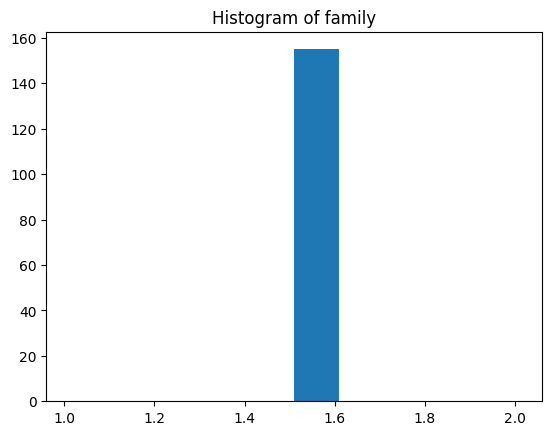

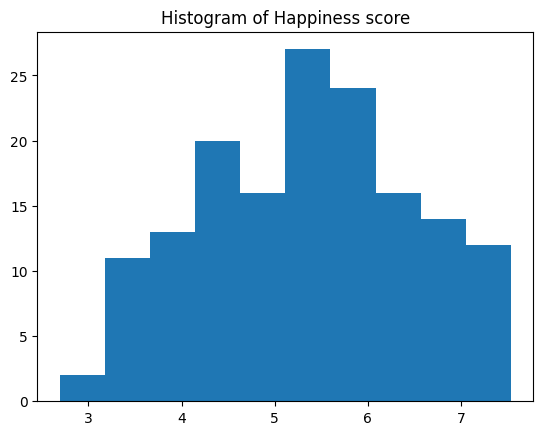

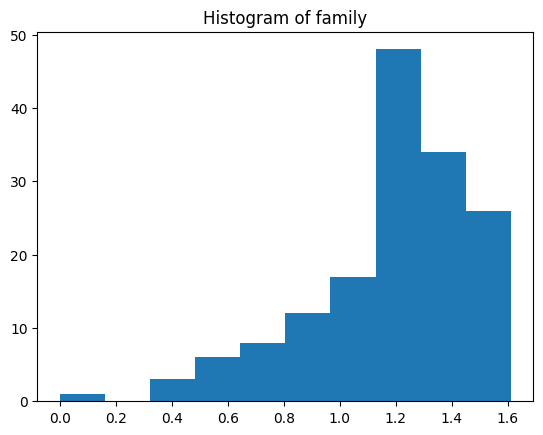

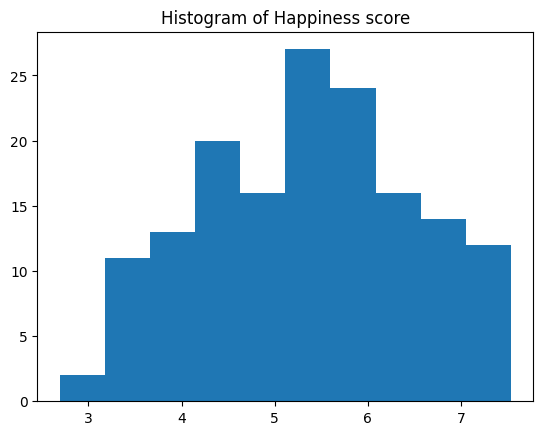

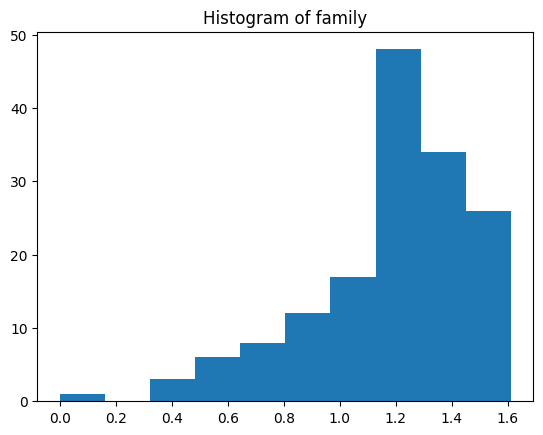

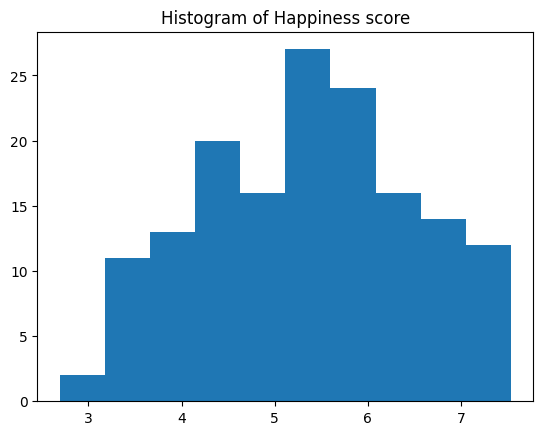

In [ ]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogramFamily1(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogramFamily1(inputs1, 'family')
plotDataHistogramFamily1(outputs1, 'Happiness score')


plotDataHistogramFamily1(inputs2, 'family')
plotDataHistogramFamily1(outputs2, 'Happiness score')

plotDataHistogramFamily1(inputs3, 'family')
plotDataHistogramFamily1(outputs3, 'Happiness score')

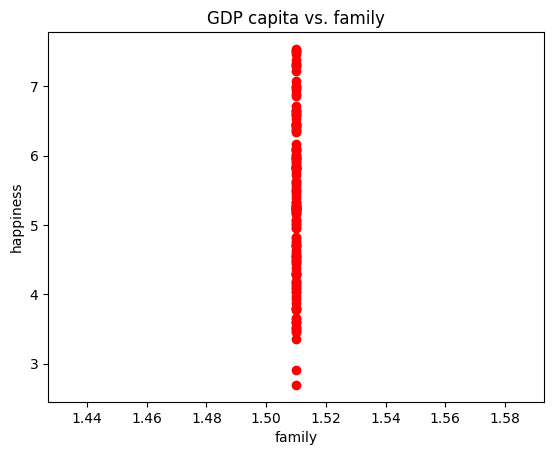

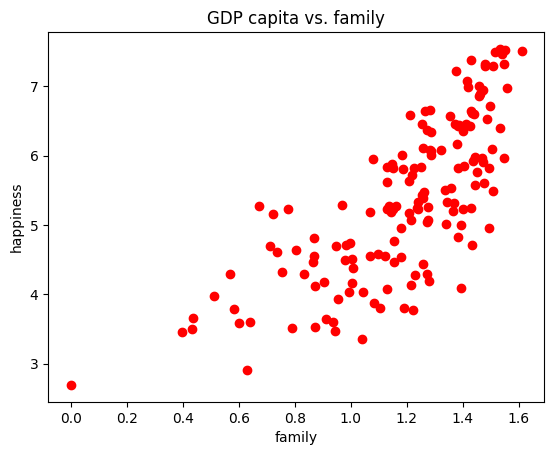

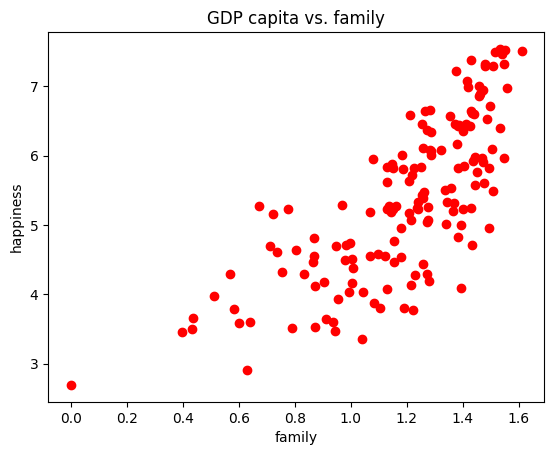

In [ ]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
def checkLinearityFamily1(inputs, outputs):
  plt.plot(inputs, outputs, 'ro')
  plt.xlabel('family')
  plt.ylabel('happiness')
  plt.title('GDP capita vs. family')
  plt.show()

checkLinearityFamily1(inputs1, outputs1)
checkLinearityFamily1(inputs2, outputs2)
checkLinearityFamily1(inputs3, outputs3)


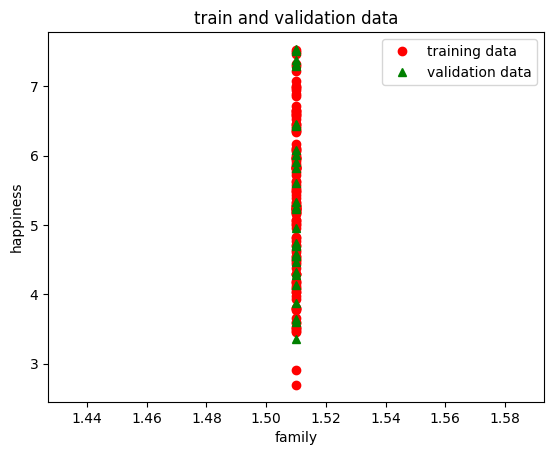

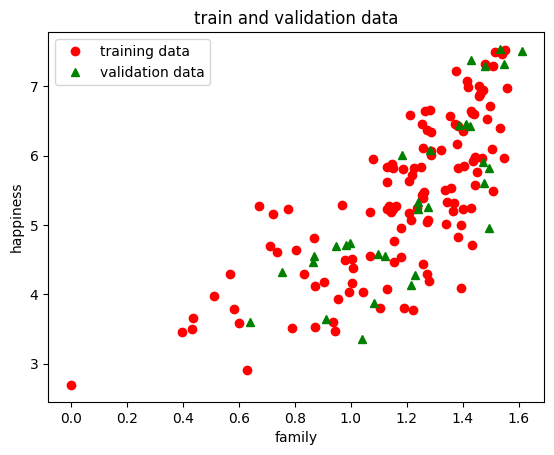

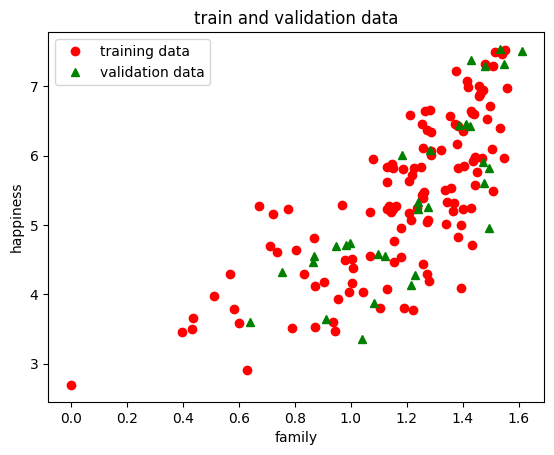

In [ ]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.
def data_split_family_1(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  validationSample = [i for i in indexes  if not i in trainSample]

  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]

  validationInputs = [inputs[i] for i in validationSample]
  validationOutputs = [outputs[i] for i in validationSample]

  plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
  plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
  plt.title('train and validation data')
  plt.xlabel('family')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

  return trainInputs, trainOutputs, validationInputs, validationOutputs

trainInputs1, trainOutputs1, validationInputs1, validationOutputs1 = data_split_family_1(inputs1, outputs1)
trainInputs2, trainOutputs2, validationInputs2, validationOutputs2 = data_split_family_1(inputs2, outputs2)
trainInputs3, trainOutputs3, validationInputs3, validationOutputs3 = data_split_family_1(inputs3, outputs3)


In [ ]:
def learn_model_family_1(trainInputs, trainOutputs):
  xx = [[el] for el in trainInputs]

  # model initialisation
  regressor = linear_model.LinearRegression()
  # training the model by using the training inputs and known training outputs
  regressor.fit(xx, trainOutputs)
  # save the model parameters
  w0, w1 = regressor.intercept_, regressor.coef_[0]
  print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

  return regressor, w0, w1

regressor1, w01, w11 = learn_model_family_1(inputs1, outputs1)
regressor2, w02, w12 = learn_model_family_1(inputs2, outputs2)
regressor3, w03, w13 = learn_model_family_1(inputs3, outputs3)

the learnt model: f(x) =  10.448177865634442  +  -3.373521181390495  * x
the learnt model: f(x) =  1.8298321525673122  +  2.9642475156757095  * x
the learnt model: f(x) =  1.8298321525673122  +  2.9642475156757095  * x


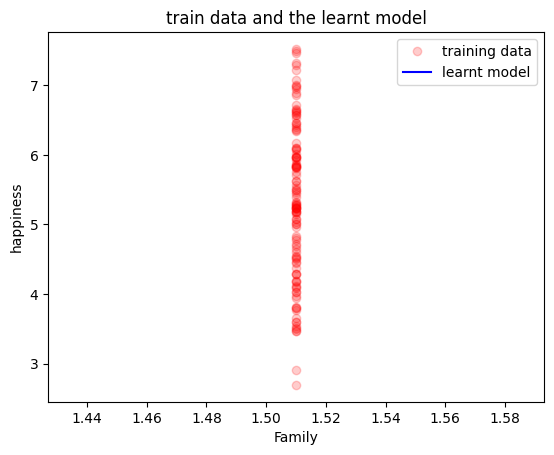

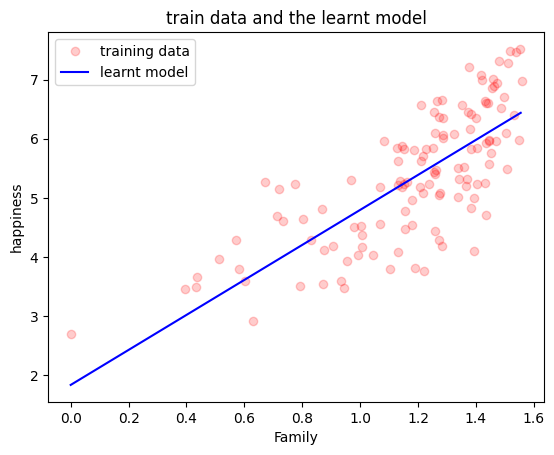

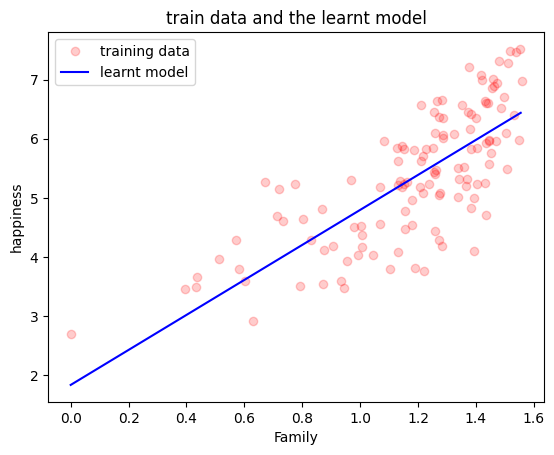

In [ ]:
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)

def plot_learnt_model_family_1(regressor, w0, w1, trainInputs, trainOutputs):
  noOfPoints = 1000
  xref = []
  val = min(trainInputs)
  step = (max(trainInputs) - min(trainInputs)) / noOfPoints
  for i in range(1, noOfPoints):
      xref.append(val)
      val += step
  yref = [w0 + w1 * el for el in xref]

  plt.plot(trainInputs, trainOutputs, 'ro', alpha=0.2, label = 'training data')  #train data are plotted by red and circle sign
  plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
  plt.title('train data and the learnt model')
  plt.xlabel('Family')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

plot_learnt_model_family_1(regressor1, w01, w11, trainInputs1, trainOutputs1)
plot_learnt_model_family_1(regressor2, w02, w12, trainInputs2, trainOutputs2)
plot_learnt_model_family_1(regressor3, w03, w13, trainInputs3, trainOutputs3)

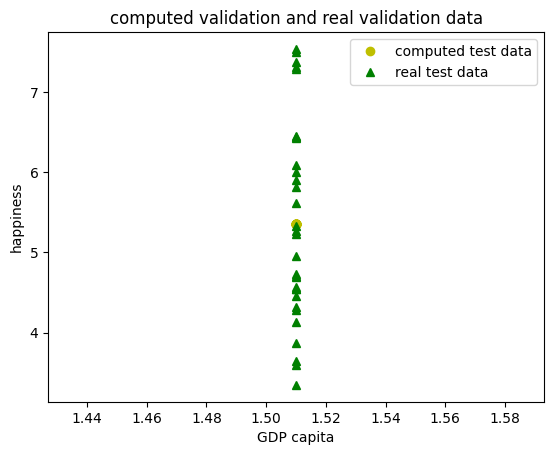

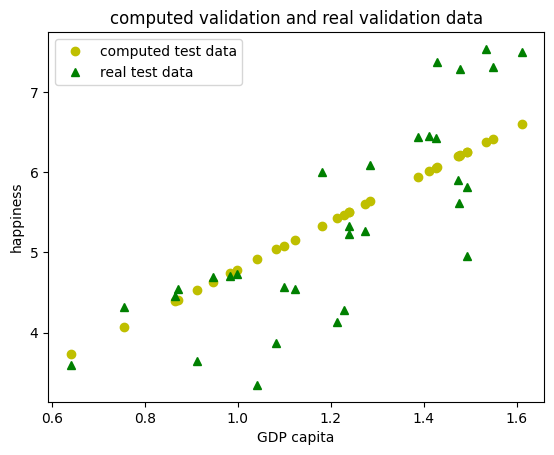

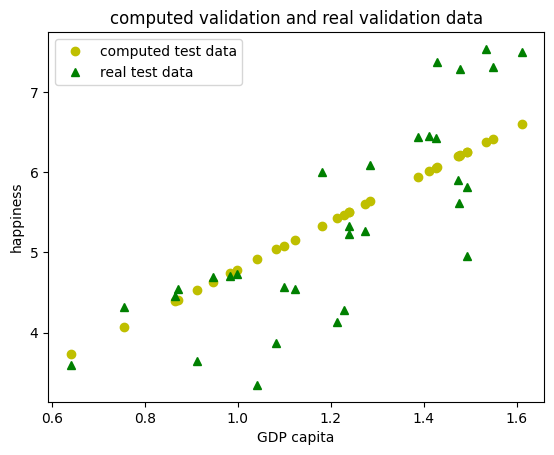

In [ ]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]

# makes predictions for test data (by tool)

def make_predictions_family_1(regressor, validationInputs, validationOutputs):
  computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

  # plot the computed outputs (see how far they are from the real outputs)
  plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
  plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
  plt.title('computed validation and real validation data')
  plt.xlabel('GDP capita')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

  return computedValidationOutputs

computedValidationOutputs1 = make_predictions_family_1(regressor1, validationInputs1, validationOutputs1)
computedValidationOutputs2 = make_predictions_family_1(regressor2, validationInputs2, validationOutputs2)
computedValidationOutputs3 = make_predictions_family_1(regressor3, validationInputs3, validationOutputs3)

In [ ]:
# compute the differences between the predictions and real outputs
# "manual" computation
def compute_error(computedValidationOutputs, validationOutputs):
  error = 0.0
  for t1, t2 in zip(computedValidationOutputs, validationOutputs):
      error += (t1 - t2) ** 2
  error = error / len(validationOutputs)
  print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error
def compute_error_sklearn(validationOutputs, computedValidationOutputs):
  error = mean_squared_error(validationOutputs, computedValidationOutputs)
  print('prediction error (tool):  ', error)

compute_error(computedValidationOutputs1, validationOutputs1)
compute_error_sklearn(validationOutputs1, computedValidationOutputs1)

compute_error(computedValidationOutputs2, validationOutputs2)
compute_error_sklearn(validationOutputs2, computedValidationOutputs2)

compute_error(computedValidationOutputs3, validationOutputs3)
compute_error_sklearn(validationOutputs3, computedValidationOutputs3)

prediction error (manual):  1.4889691899442379
prediction error (tool):   1.4889691899442377
prediction error (manual):  0.5822889704129736
prediction error (tool):   0.5822889704129737
prediction error (manual):  0.5822889704129736
prediction error (tool):   0.5822889704129737


Problema 1 pentru
Produsul intern brut si de gradul de libertate

In [ ]:

def loadDataFromGitHubGDP_F1(github_raw_url, inputVariabName1, inputVariabName2, outputVariabName):
    # Descarcă fișierul de pe GitHub
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

        gdp_idx = dataNames.index(inputVariabName1)
    freedom_idx = dataNames.index(inputVariabName2)
    happiness_idx = dataNames.index(outputVariabName)

    inputs = []
    outputs = []
    gdp_values = []
    freedom_values = []
    happiness_values = []
    invalid_rows = 0

    for row in data:
        try:
            gdp = float(row[gdp_idx])
            freedom = float(row[freedom_idx])
            happiness = float(row[happiness_idx])

            # Validare valori
            if gdp > 0 and freedom > 0 and happiness > 0:
                inputs.append([gdp, freedom])
                outputs.append(happiness)
                gdp_values.append(gdp)
                freedom_values.append(freedom)
                happiness_values.append(happiness)
            else:
                invalid_rows += 1
        except (ValueError, IndexError):
            invalid_rows += 1

    # Raport statistic
    print(f"\nStatistici încărcare:")
    print(f"- Rânduri totale: {len(data)}")
    print(f"- Rânduri valide: {len(inputs)}")
    print(f"- Rânduri filtrate: {invalid_rows}")

    return inputs, outputs, gdp_values, freedom_values, happiness_values

# Link-ul raw către fișierul de pe GitHub

inputs1, outputs1, gdp1, freedom1, happiness1 = loadDataFromGitHubGDP_F1(
        github_raw_url1,
        'Economy..GDP.per.Capita.',
        'Freedom',
        'Happiness.Score'
    )
inputs2, outputs2, gdp2, freedom2, happiness2 = loadDataFromGitHubGDP_F1(
        github_raw_url2,
        'Economy..GDP.per.Capita.',
        'Freedom',
        'Happiness.Score'
    )
inputs3, outputs3, gdp3, freedom3, happiness3 = loadDataFromGitHubGDP_F1(
        github_raw_url3,
        'Economy..GDP.per.Capita.',
        'Freedom',
        'Happiness.Score'
    )


Statistici încărcare:
- Rânduri totale: 155
- Rânduri valide: 153
- Rânduri filtrate: 2

Statistici încărcare:
- Rânduri totale: 155
- Rânduri valide: 154
- Rânduri filtrate: 1

Statistici încărcare:
- Rânduri totale: 155
- Rânduri valide: 147
- Rânduri filtrate: 8


In [ ]:
def plot_histogramsGDP_F1(data, title, xlabel, color='skyblue'):
    """Funcție pentru plotarea histogramei"""
    plt.figure(figsize=(8, 5))
    plt.hist(data, color=color, alpha=0.7)
    plt.title(f'Distribuția {title}', fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frecvență', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

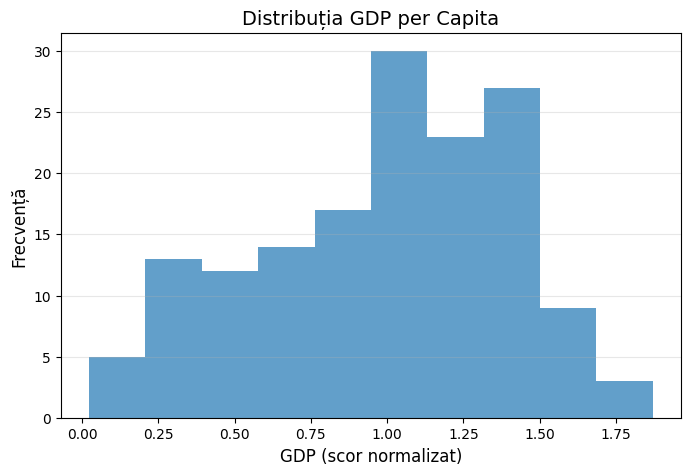

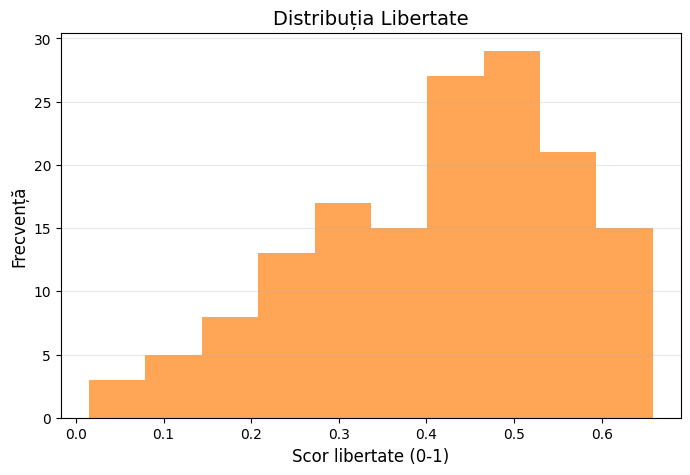

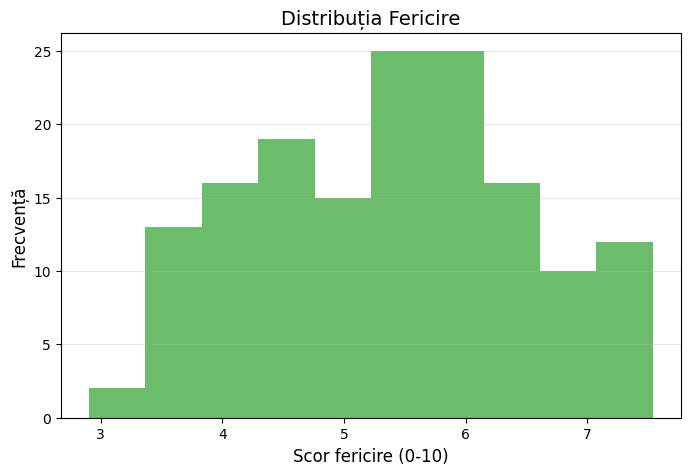

Data v2


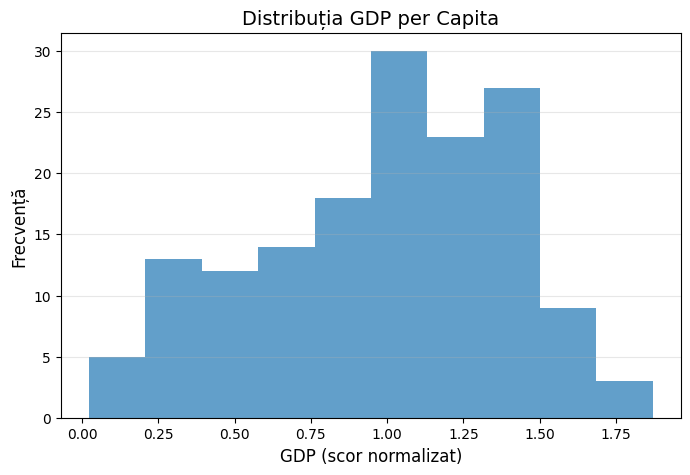

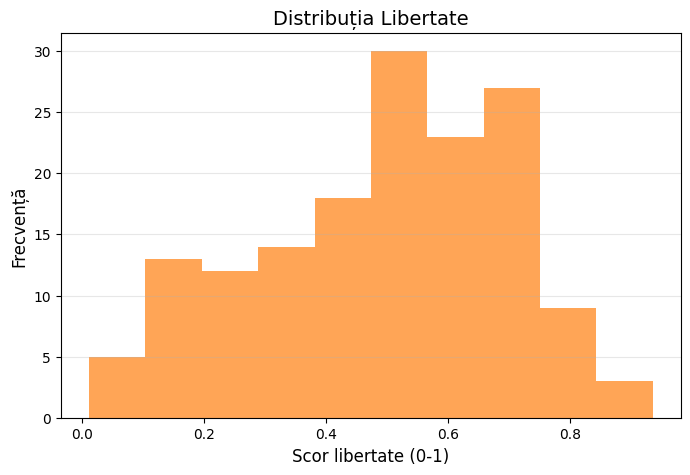

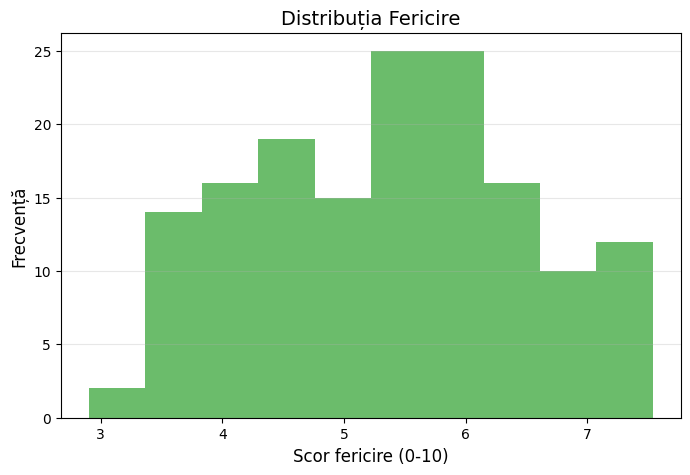

Data v3


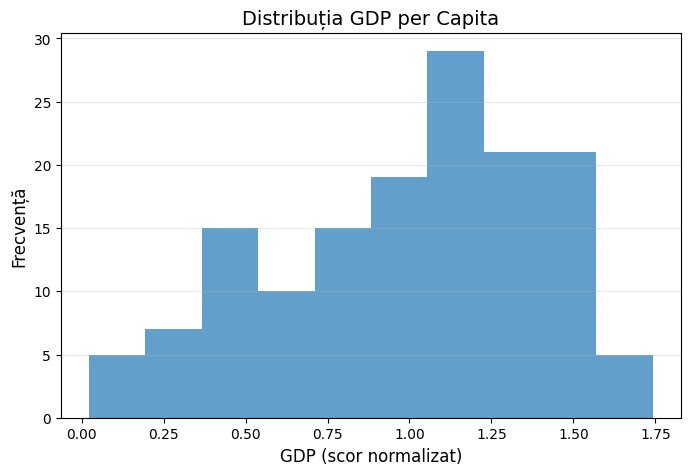

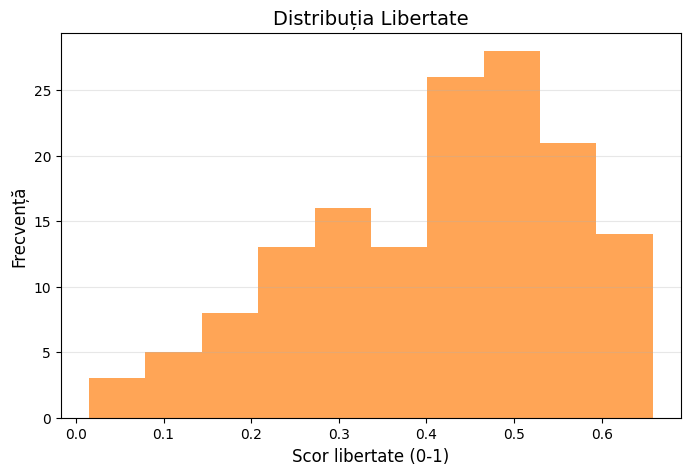

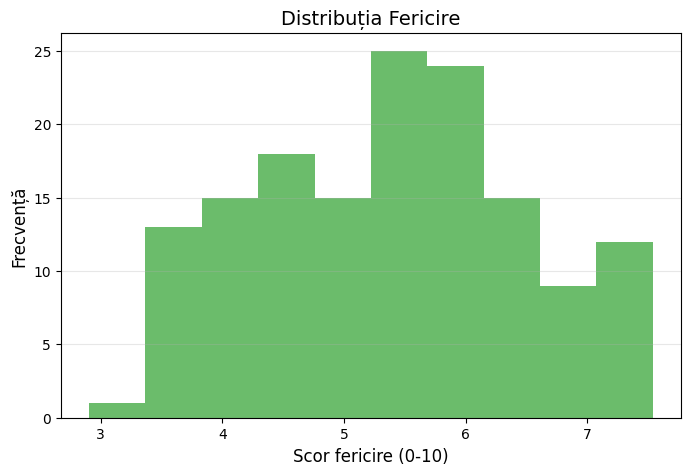

In [ ]:
plot_histogramsGDP_F1(gdp1, 'GDP per Capita', 'GDP (scor normalizat)', color='#1f77b4')
plot_histogramsGDP_F1(freedom1, 'Libertate', 'Scor libertate (0-1)', color='#ff7f0e')
plot_histogramsGDP_F1(happiness1, 'Fericire', 'Scor fericire (0-10)', color='#2ca02c')

print("Data v2")
plot_histogramsGDP_F1(gdp2, 'GDP per Capita', 'GDP (scor normalizat)', color='#1f77b4')
plot_histogramsGDP_F1(freedom2, 'Libertate', 'Scor libertate (0-1)', color='#ff7f0e')
plot_histogramsGDP_F1(happiness2, 'Fericire', 'Scor fericire (0-10)', color='#2ca02c')

print("Data v3")
plot_histogramsGDP_F1(gdp3, 'GDP per Capita', 'GDP (scor normalizat)', color='#1f77b4')
plot_histogramsGDP_F1(freedom3, 'Libertate', 'Scor libertate (0-1)', color='#ff7f0e')
plot_histogramsGDP_F1(happiness3, 'Fericire', 'Scor fericire (0-10)', color='#2ca02c')

Date v1


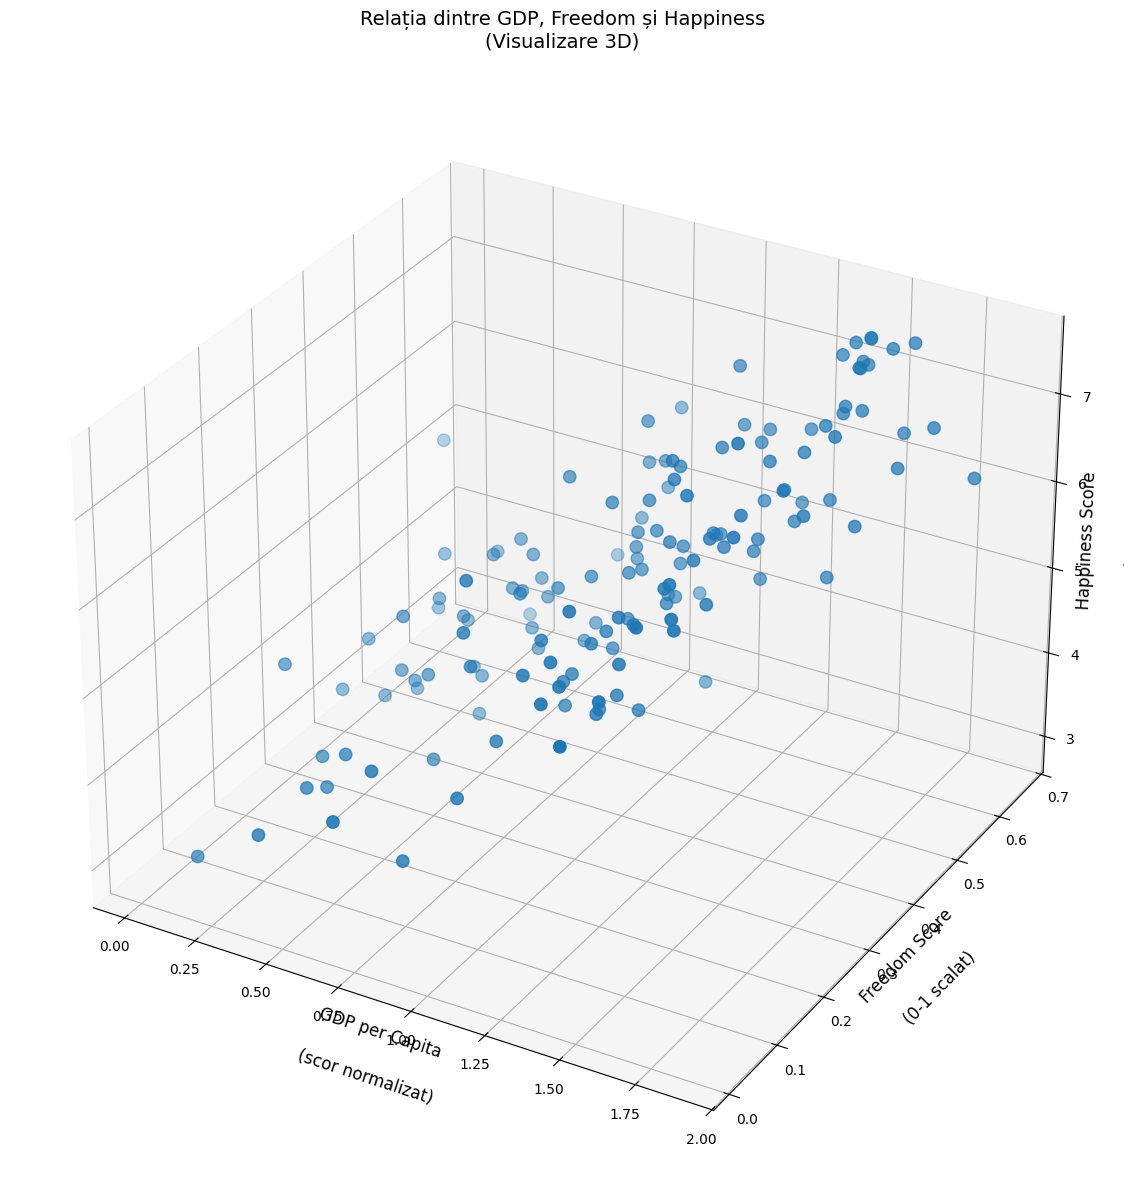

Date v2


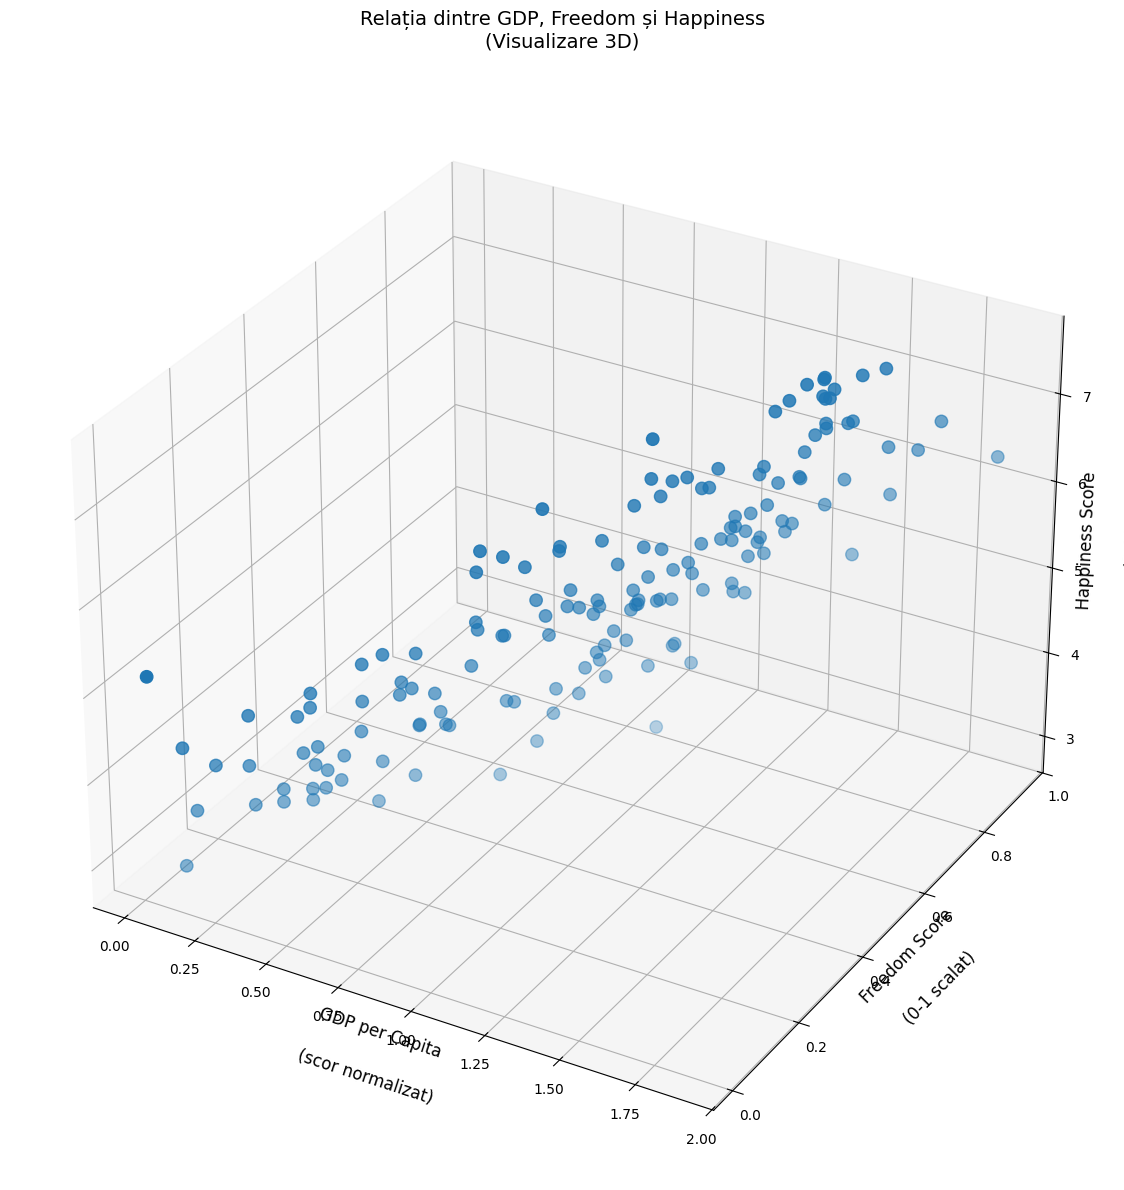

Date v3


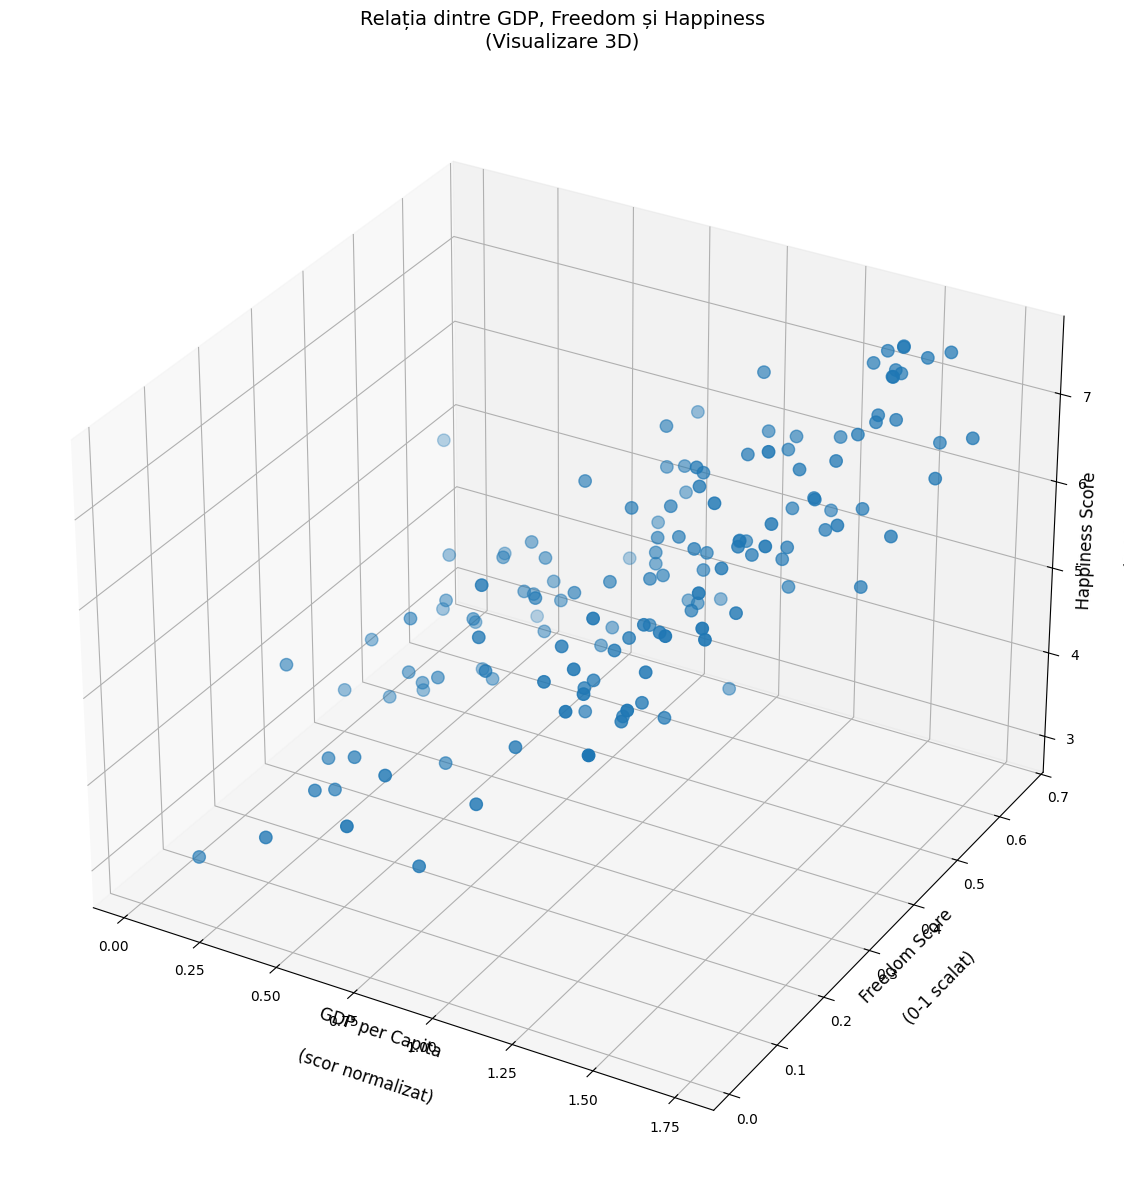

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def checkLinearity3D(inputs, outputs, figsize=(14, 10)):
    """
    Vizualizare 3D mare a relației dintre GDP, Freedom și Happiness
    Args:
        inputs: Listă de tuple (GDP, Freedom)
        outputs: Listă de scoruri Happiness
        figsize: Dimensiunea figurii (lățime, înălțime)
    """
    gdp = [x[0] for x in inputs]
    freedom = [x[1] for x in inputs]
    happiness = outputs

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        gdp, freedom, happiness,
        s=80
    )

    ax.set_xlabel('GDP per Capita\n(scor normalizat)', fontsize=12, linespacing=3)
    ax.set_ylabel('Freedom Score\n(0-1 scalat)', fontsize=12, linespacing=3)
    ax.set_zlabel('Happiness Score\n(0-10)', fontsize=12, linespacing=3)

    plt.title('Relația dintre GDP, Freedom și Happiness\n(Visualizare 3D)',
             fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Date v1")
checkLinearity3D(inputs1, outputs1, figsize=(16, 12))

print("Date v2")
checkLinearity3D(inputs2, outputs2, figsize=(16, 12))

print("Date v3")
checkLinearity3D(inputs3, outputs3, figsize=(16, 12))

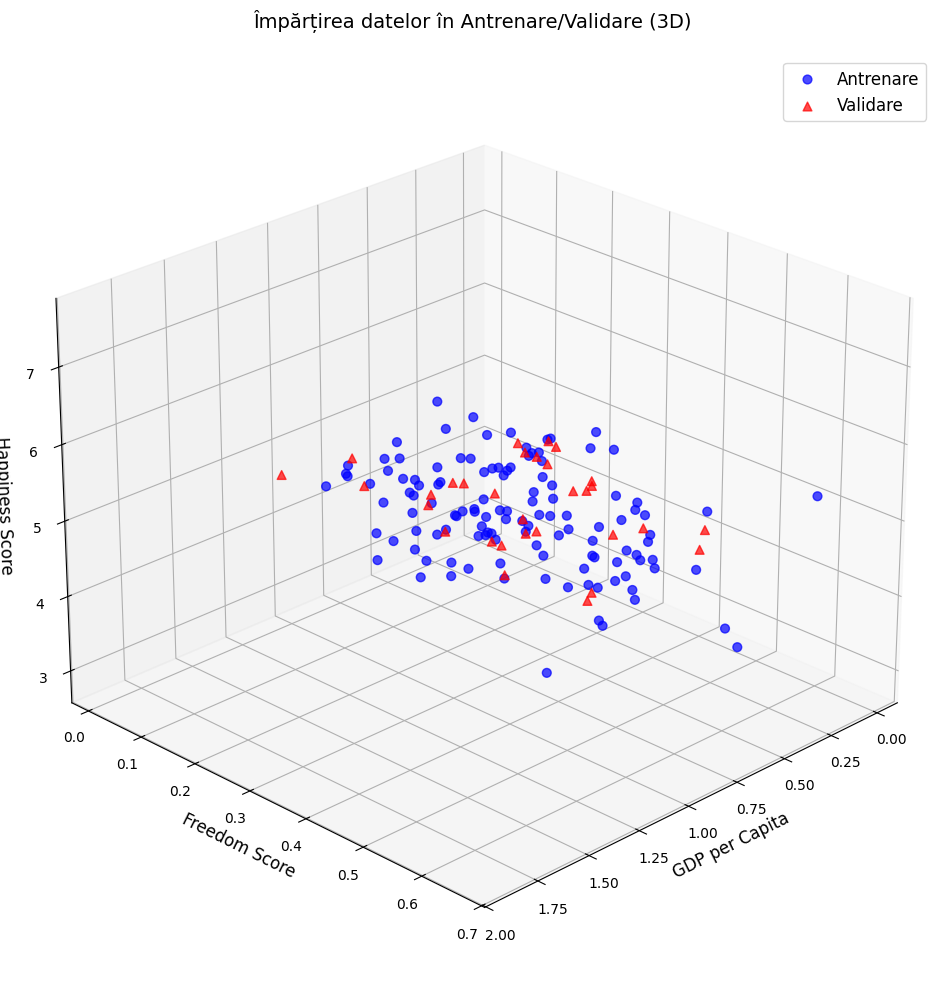

Statistici împărțire:
- Total instanțe: 153
- Antrenare: 122 (79.7%)
- Validare: 31 (20.3%)


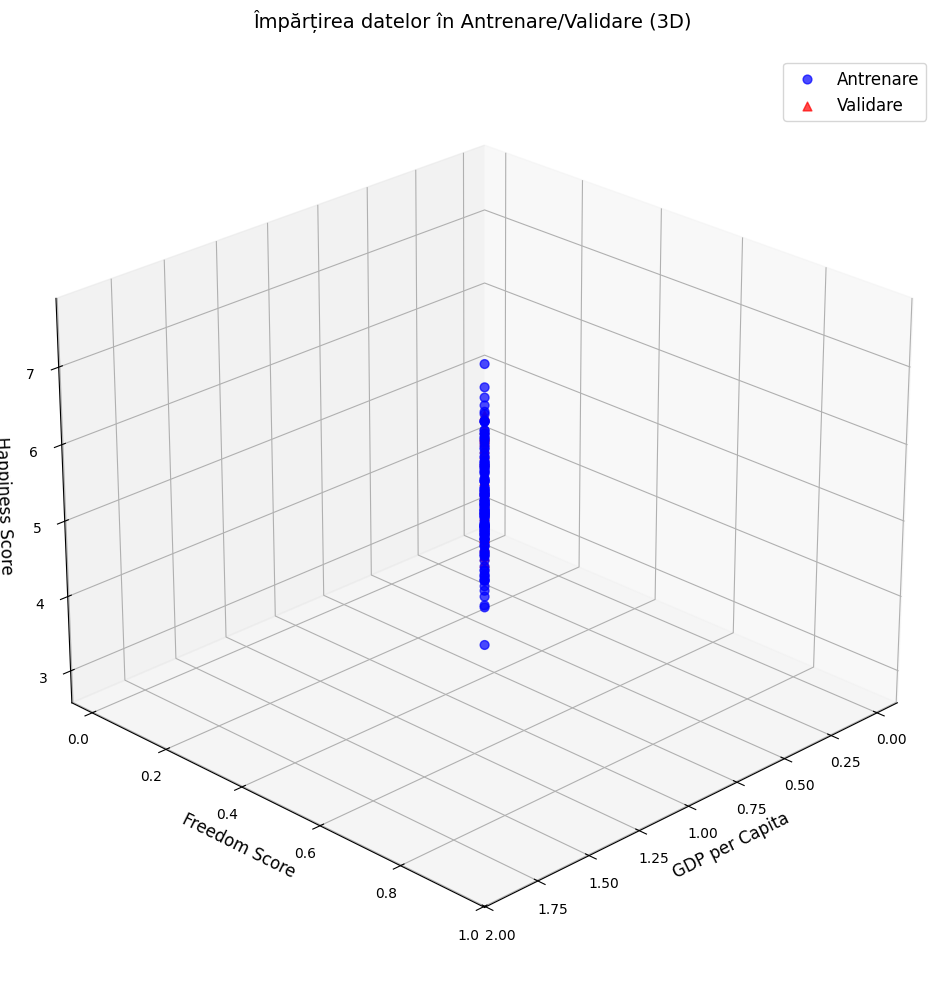

Statistici împărțire:
- Total instanțe: 154
- Antrenare: 123 (79.9%)
- Validare: 31 (20.1%)


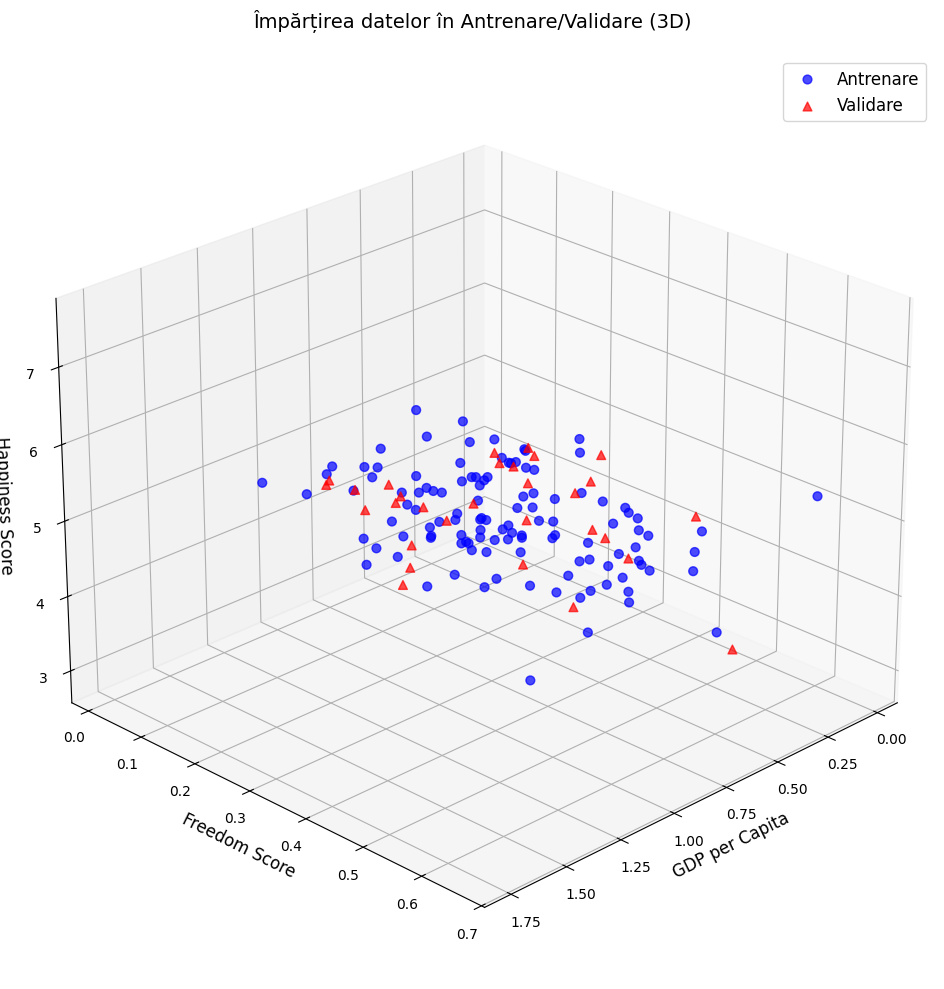

Statistici împărțire:
- Total instanțe: 147
- Antrenare: 117 (79.6%)
- Validare: 30 (20.4%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def data_split_gdp_freedom_happiness(inputs, outputs):
  np.random.seed(5)
  indexes = np.arange(len(inputs))
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
  validationSample = np.setdiff1d(indexes, trainSample)

  trainGDP = [inputs[i][0] for i in trainSample]
  trainFreedom = [inputs[i][1] for i in trainSample]
  trainHappiness = [outputs[i] for i in trainSample]

  valGDP = [inputs[i][0] for i in validationSample]
  valFreedom = [inputs[i][1] for i in validationSample]
  valHappiness = [outputs[i] for i in validationSample]

  fig = plt.figure(figsize=(14, 10))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(trainGDP, trainFreedom, trainHappiness,
            c='blue', marker='o', s=40, alpha=0.7, label='Antrenare')

  ax.scatter(valGDP, valFreedom, valHappiness,
            c='red', marker='^', s=40, alpha=0.7, label='Validare')

  ax.set_xlabel('GDP per Capita', fontsize=12)
  ax.set_ylabel('Freedom Score', fontsize=12)
  ax.set_zlabel('Happiness Score', fontsize=12)
  ax.set_title('Împărțirea datelor în Antrenare/Validare (3D)', fontsize=14, pad=20)
  ax.legend(fontsize=12)
  ax.grid(True, alpha=0.3)

  ax.view_init(elev=25, azim=45)

  plt.tight_layout()
  plt.show()

  print(f"Statistici împărțire:")
  print(f"- Total instanțe: {len(inputs)}")
  print(f"- Antrenare: {len(trainSample)} ({len(trainSample)/len(inputs):.1%})")
  print(f"- Validare: {len(validationSample)} ({len(validationSample)/len(inputs):.1%})")

  return trainGDP, trainFreedom, trainHappiness, valGDP, valFreedom, valHappiness

trainGDP1, trainFreedom1, trainHappiness1, valGDP1, valFreedom1, valHappiness1 = data_split_gdp_freedom_happiness(inputs1, outputs1)
trainGDP2, trainFreedom2, trainHappiness2, valGDP2, valFreedom2, valHappiness2 = data_split_gdp_freedom_happiness(inputs2, outputs2)
trainGDP3, trainFreedom3, trainHappiness3, valGDP3, valFreedom3, valHappiness3 = data_split_gdp_freedom_happiness(inputs3, outputs3)

In [ ]:
import numpy as np
from sklearn import linear_model

def learn_model_gdp_freedom_happiness(trainGDP, trainFreedom, trainOutputs):

  print(f"Lungimi liste originale:")
  print(f"- trainGDP: {len(trainGDP)}")
  print(f"- trainFreedom: {len(trainFreedom)}")
  print(f"- trainOutputs: {len(trainOutputs)}")

  min_len = min(len(trainGDP), len(trainFreedom), len(trainOutputs))
  print(f"\nSe vor folosi primele {min_len} valori din fiecare listă")

  trainGDP = trainGDP[:min_len]
  trainFreedom = trainFreedom[:min_len]
  trainOutputs = trainOutputs[:min_len]

  X_train = np.column_stack((trainGDP, trainFreedom))
  y_train = np.array(trainOutputs)

  try:
      regressor = linear_model.LinearRegression()
      regressor.fit(X_train, y_train)
      print(f"the learnt model f(x) = {regressor.intercept_:.4f} + {regressor.coef_[0]}*x1 + {regressor.coef_[1]}*x2 \n")

  except Exception as e:
      print(f"\nEroare la antrenare: {str(e)}")

  return X_train, y_train, regressor

X_train1, y_train1, regressor1 = learn_model_gdp_freedom_happiness(trainGDP1, trainFreedom1, trainHappiness1)
X_train2, y_train2, regressor2 = learn_model_gdp_freedom_happiness(trainGDP2, trainFreedom2, trainHappiness2)
X_train3, y_train3, regressor3 = learn_model_gdp_freedom_happiness(trainGDP3, trainFreedom3, trainHappiness3)

Lungimi liste originale:
- trainGDP: 122
- trainFreedom: 122
- trainOutputs: 122

Se vor folosi primele 122 valori din fiecare listă
the learnt model f(x) = 2.5734 + 1.88383836211687*x1 + 2.1945991815049575*x2 

Lungimi liste originale:
- trainGDP: 123
- trainFreedom: 123
- trainOutputs: 123

Se vor folosi primele 123 valori din fiecare listă
the learnt model f(x) = 3.2111 + -1849328.0285375922*x1 + 3698660.3397609033*x2 

Lungimi liste originale:
- trainGDP: 117
- trainFreedom: 117
- trainOutputs: 117

Se vor folosi primele 117 valori din fiecare listă
the learnt model f(x) = 2.5506 + 1.8752990569583812*x1 + 2.3668306494341858*x2 



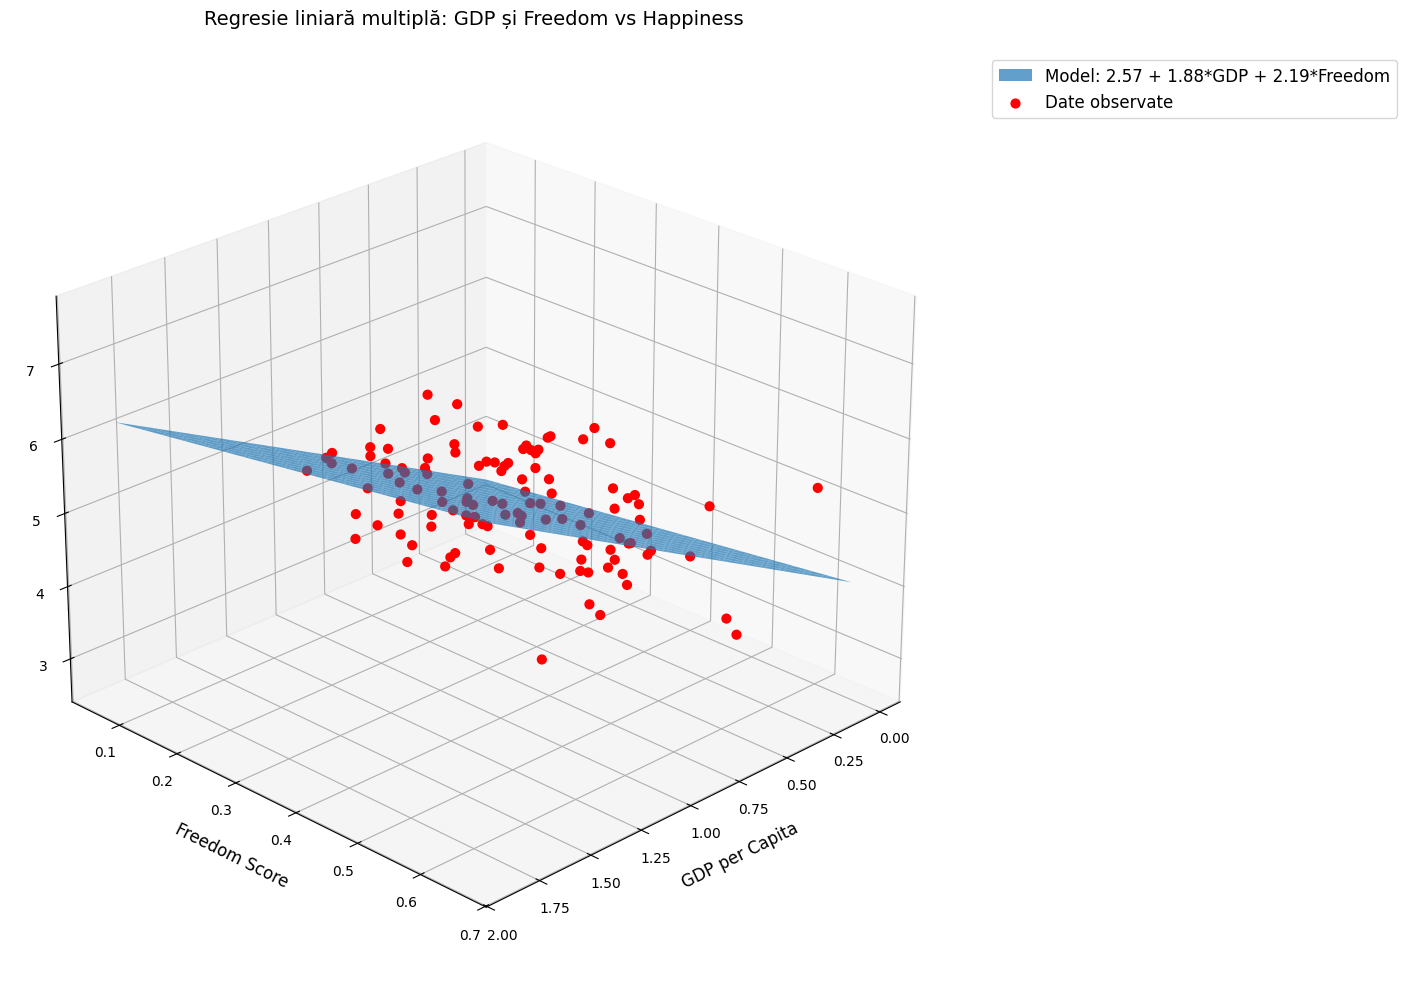

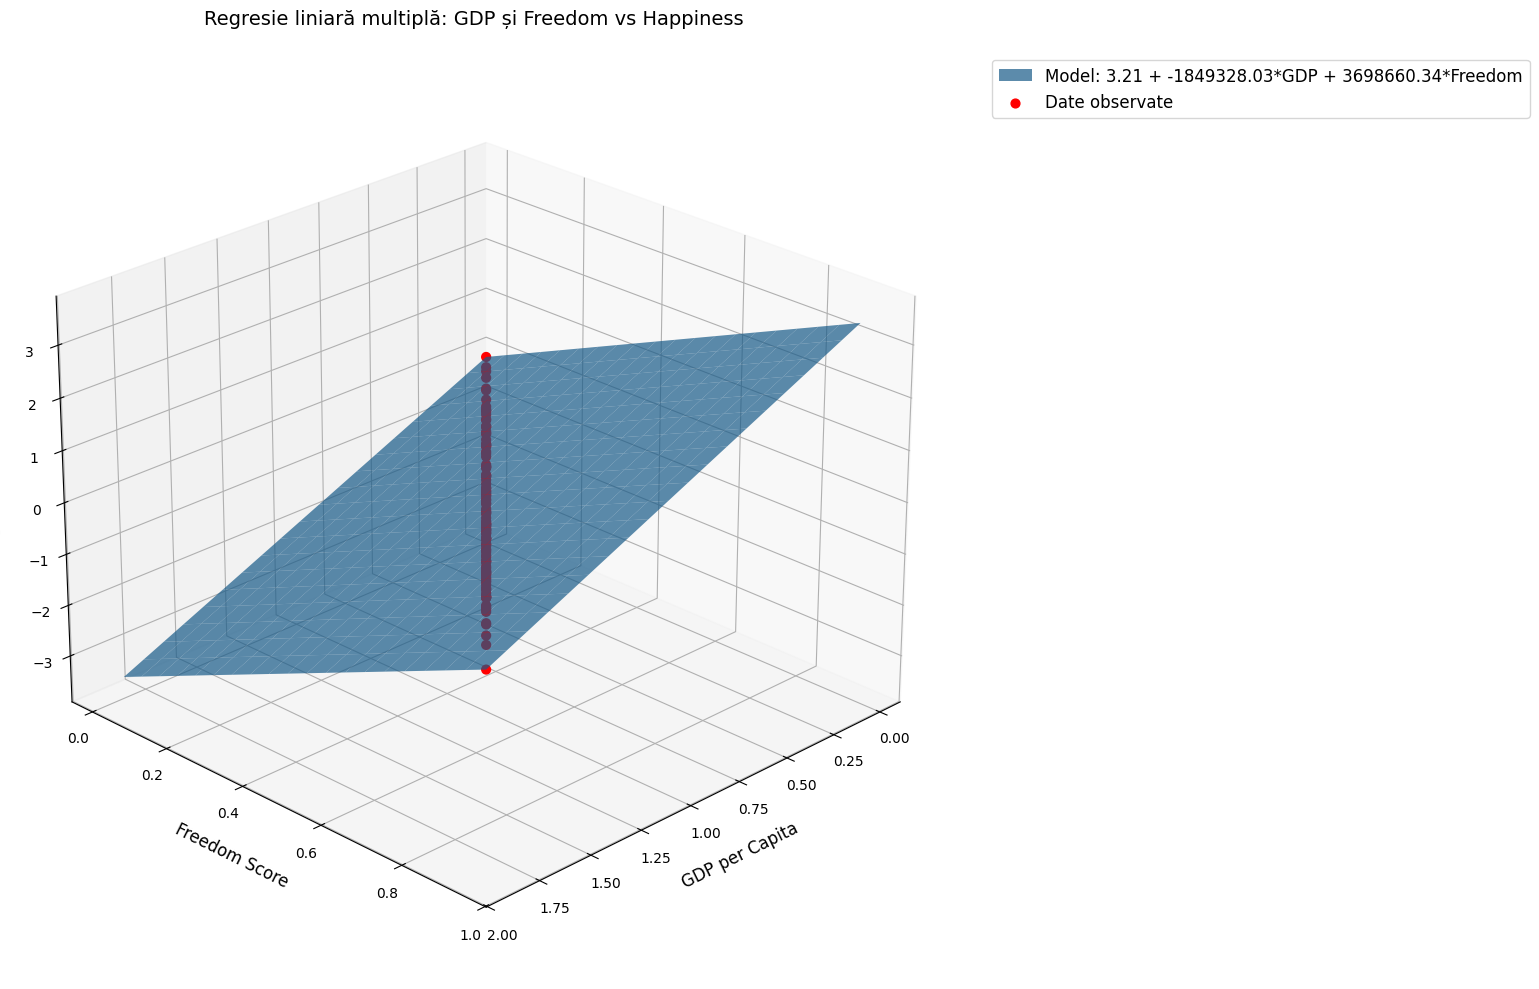

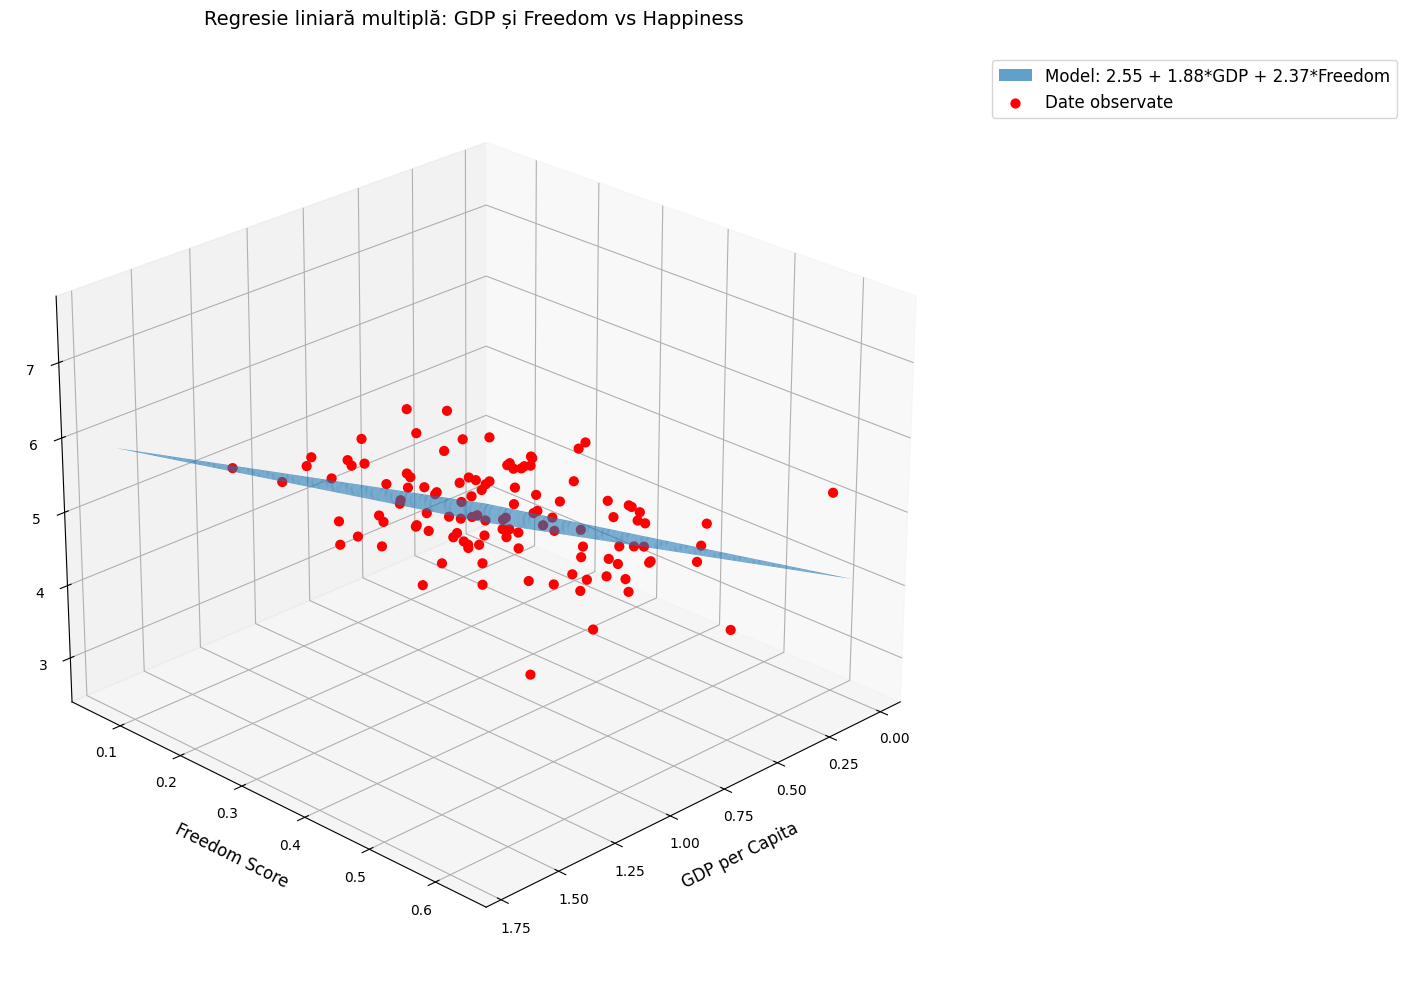

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_regression(X_train, y_train, regressor):
    """
    Vizualizare 3D a modelului de regresie cu două variabile
    Args:
        X_train: matrice numpy de forma (n_samples, 2) [GDP, Freedom]
        y_train: vector numpy de forma (n_samples,) [Happiness]
        regressor: modelul LinearRegression antrenat
    """
    w0 = regressor.intercept_
    w1, w2 = regressor.coef_

    gdp = X_train[:, 0]
    freedom = X_train[:, 1]

    gdp_range = np.linspace(min(gdp), max(gdp), 20)
    freedom_range = np.linspace(min(freedom), max(freedom), 20)
    gdp_grid, freedom_grid = np.meshgrid(gdp_range, freedom_range)

    happiness_grid = w0 + w1*gdp_grid + w2*freedom_grid

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(gdp_grid, freedom_grid, happiness_grid,
                           alpha=0.7,
                         label=f'Model: {w0:.2f} + {w1:.2f}*GDP + {w2:.2f}*Freedom')

    ax.scatter(gdp, freedom, y_train,
              c='red', s=40, alpha=1,
              label='Date observate')

    ax.set_xlabel('GDP per Capita', fontsize=12, labelpad=10)
    ax.set_ylabel('Freedom Score', fontsize=12, labelpad=10)
    ax.set_zlabel('Happiness Score', fontsize=12, labelpad=10)
    ax.set_title('Regresie liniară multiplă: GDP și Freedom vs Happiness',
                fontsize=14, pad=20)

    ax.view_init(elev=25, azim=45)


    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_3d_regression(X_train1, y_train1, regressor1)
plot_3d_regression(X_train2, y_train2, regressor2)
plot_3d_regression(X_train3, y_train3, regressor3)

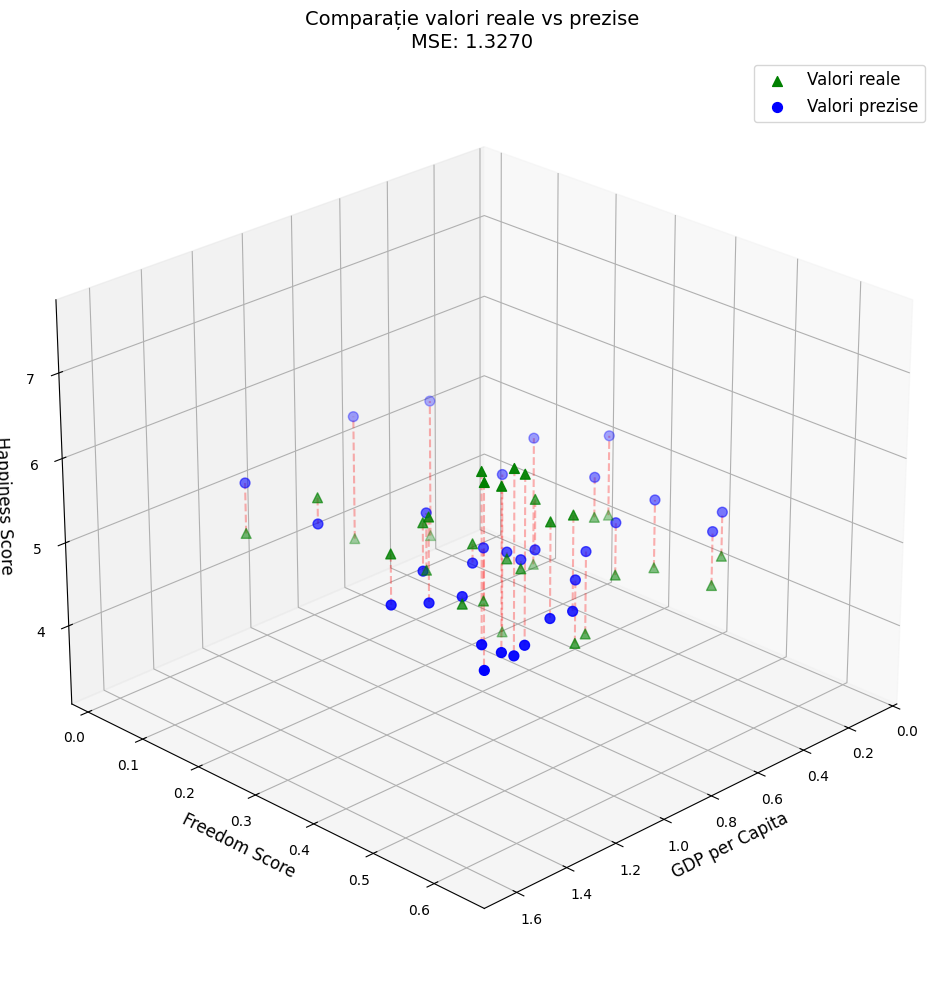

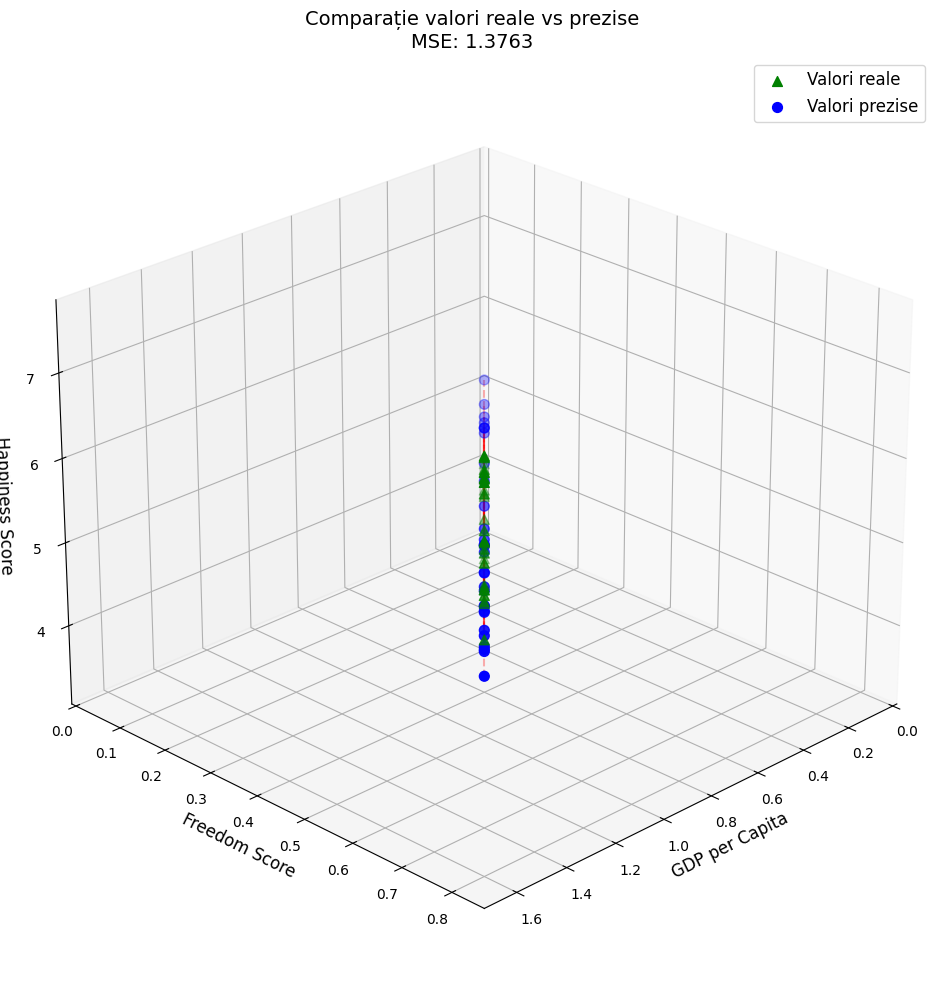

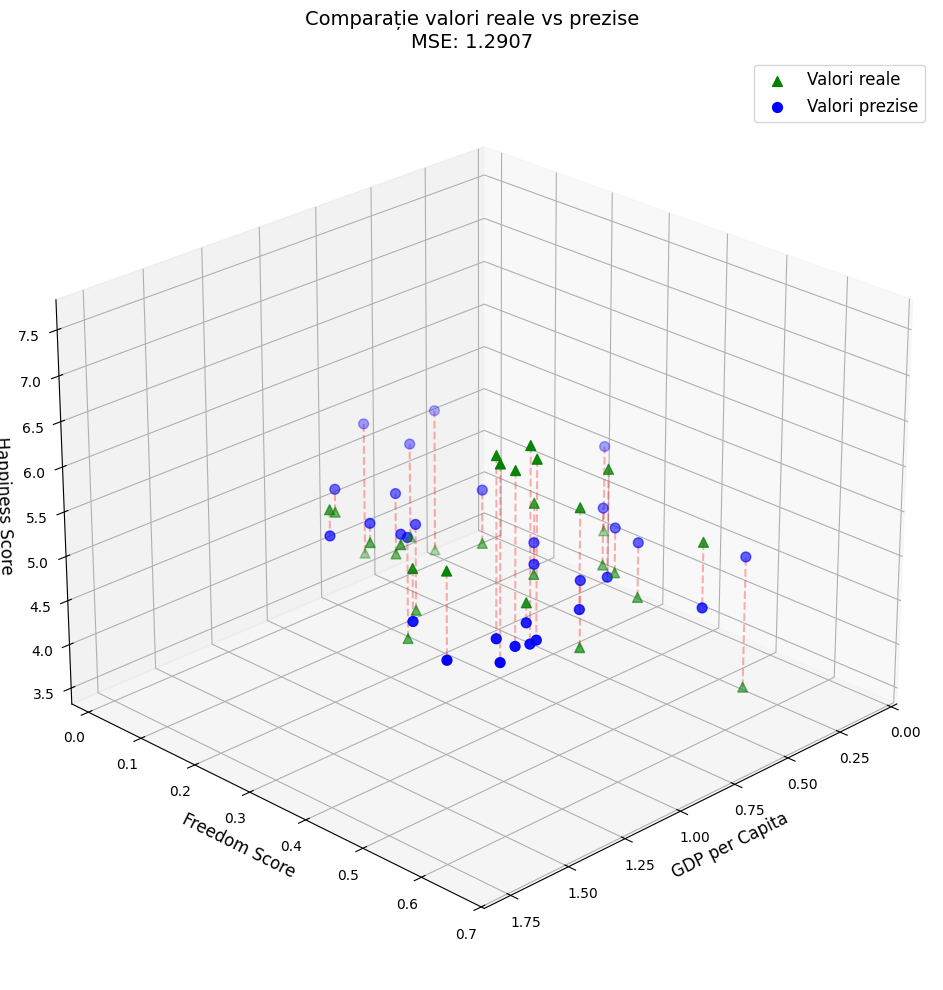

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compare_validation_and_computed_outputs(valGDP, valFreedom, validationInputs, validationOutputs):
  min_length = min(len(valGDP), len(valFreedom), len(validationOutputs))
  valGDP = valGDP[:min_length]
  valFreedom = valFreedom[:min_length]
  validationOutputs = validationOutputs[:min_length]

  validationInputs = np.column_stack((valGDP, valFreedom))
  validationOutputs = np.array(validationOutputs)

  computedValidationOutputs = regressor.predict(validationInputs)
  errors = validationOutputs - computedValidationOutputs
  mse = np.mean(errors**2)

  fig = plt.figure(figsize=(14, 10))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(valGDP, valFreedom, validationOutputs,
            c='green', marker='^', s=50, label='Valori reale')

  ax.scatter(valGDP, valFreedom, computedValidationOutputs,
            c='blue', marker='o', s=50, label='Valori prezise')

  for gdp, freedom, real, pred in zip(valGDP, valFreedom, validationOutputs, computedValidationOutputs):
      ax.plot([gdp, gdp], [freedom, freedom], [real, pred], 'r--', alpha=0.3)

  ax.set_xlabel('GDP per Capita', fontsize=12)
  ax.set_ylabel('Freedom Score', fontsize=12)
  ax.set_zlabel('Happiness Score', fontsize=12)
  ax.set_title(f'Comparație valori reale vs prezise\nMSE: {mse:.4f}', fontsize=14)
  ax.legend(fontsize=12)
  ax.view_init(elev=25, azim=45)
  plt.tight_layout()
  plt.show()

compare_validation_and_computed_outputs(valGDP1, valFreedom1, valHappiness1, validationOutputs1)
compare_validation_and_computed_outputs(valGDP2, valFreedom2, valHappiness2, validationOutputs2)
compare_validation_and_computed_outputs(valGDP3, valFreedom3, valHappiness3, validationOutputs3)

In [ ]:
# compute the differences between the predictions and real outputs
# "manual" computation
def compute_error2(computedValidationOutputs, validationOutputs):
  error = 0.0
  for t1, t2 in zip(computedValidationOutputs, validationOutputs):
      error += (t1 - t2) ** 2
  error = error / len(validationOutputs)
  print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

def compute_error_sklearn2(validationOutputs, computedValidationOutputs):
  error = mean_squared_error(validationOutputs, computedValidationOutputs)
  print('prediction error (tool):  ', error)

compute_error2(computedValidationOutputs1, validationOutputs1)
compute_error_sklearn2(validationOutputs1, computedValidationOutputs1)

compute_error2(computedValidationOutputs2, validationOutputs2)
compute_error_sklearn2(validationOutputs2, computedValidationOutputs2)

compute_error2(computedValidationOutputs3, validationOutputs3)
compute_error_sklearn2(validationOutputs3, computedValidationOutputs3)

prediction error (manual):  1.4889691899442379
prediction error (tool):   1.4889691899442377
prediction error (manual):  0.5822889704129736
prediction error (tool):   0.5822889704129737
prediction error (manual):  0.5822889704129736
prediction error (tool):   0.5822889704129737


# Problema 2
folosim cod propriu fara alte tool-uri


In [ ]:
import numpy as np
from math import exp
from math import log2
from numpy.linalg import inv

class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

In [ ]:
import numpy as np
from math import exp
from math import log2
from numpy.linalg import inv

class MyLinearBivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = [0.0, 0.0]
    def fit(self, x, y):

        n = len(x)

        sum_x1 = sum(val[0] for val in x)
        sum_x2 = sum(val[1] for val in x)
        sum_y = sum(y)

        sum_x1_sq = sum(val[0] * val[0] for val in x)
        sum_x2_sq = sum(val[1] * val[1] for val in x)
        sum_x1x2 = sum(val[0]*val[1] for val in x)
        sum_x1y = sum(val[0]*yi for val, yi in zip(x, y))
        sum_x2y = sum(val[1]*yi for val, yi in zip(x, y))

        # Forma generală:
        # n*w0 + sum_x1*w1 + sum_x2*w2 = sum_y
        # sum_x1*w0 + sum_x1_sq*w1 + sum_x1x2*w2 = sum_x1y
        # sum_x2*w0 + sum_x1x2*w1 + sum_x2_sq*w2 = sum_x2y

        # 3. Rezolvăm sistemul (folosind metoda substituției sau algebra liniară)
        # Calculăm determinanții
        det = n * (sum_x1_sq*sum_x2_sq - sum_x1x2*sum_x1x2) \
            - sum_x1 * (sum_x1*sum_x2_sq - sum_x2*sum_x1x2) \
            + sum_x2 * (sum_x1*sum_x1x2 - sum_x2*sum_x1_sq)

        det_w0 = sum_y * (sum_x1_sq*sum_x2_sq - sum_x1x2*sum_x1x2) \
              - sum_x1 * (sum_x1y*sum_x2_sq - sum_x2y*sum_x1x2) \
              + sum_x2 * (sum_x1y*sum_x1x2 - sum_x2y*sum_x1_sq)

        det_w1 = n * (sum_x1y*sum_x2_sq - sum_x2y*sum_x1x2) \
              - sum_y * (sum_x1*sum_x2_sq - sum_x2*sum_x1x2) \
              + sum_x2 * (sum_x1*sum_x2y - sum_x2*sum_x1y)

        det_w2 = n * (sum_x1_sq*sum_x2y - sum_x1x2*sum_x1y) \
              - sum_x1 * (sum_x1*sum_x2y - sum_x2*sum_x1y) \
              + sum_y * (sum_x1*sum_x1x2 - sum_x2*sum_x1_sq)

        self.intercept_ = det_w0 / det
        w1 = det_w1 / det
        w2 = det_w2 / det
        self.coef_ = [w1, w2]

    def predict(self, x):
        if isinstance(x, list) and len(x) > 0 and isinstance(x[0], list):
            return [self.intercept_ + self.coef_[0]*val[0] + self.coef_[1]*val[1] for val in x]

        elif isinstance(x, np.ndarray) and x.ndim == 2:
            return np.array([self.intercept_ + self.coef_[0]*val[0] + self.coef_[1]*val[1] for val in x])

        else:
            x1 = x[0] if isinstance(x, (list, np.ndarray)) else x
            x2 = x[1] if isinstance(x, (list, np.ndarray)) and len(x) > 1 else 0
            return self.intercept_ + self.coef_[0]*x1 + self.coef_[1]*x2

Rezolvam problema pentru caracteristica family folosind cod propriu


In [ ]:
def loadDataFromGitHubFamily1(github_raw_url, inputVariabName, outputVariabName):
    # Descarcă fișierul de pe GitHub
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

# Link-ul raw către fișierul de pe GitHub

inputs, outputs = loadDataFromGitHubFamily1(github_raw_url1, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


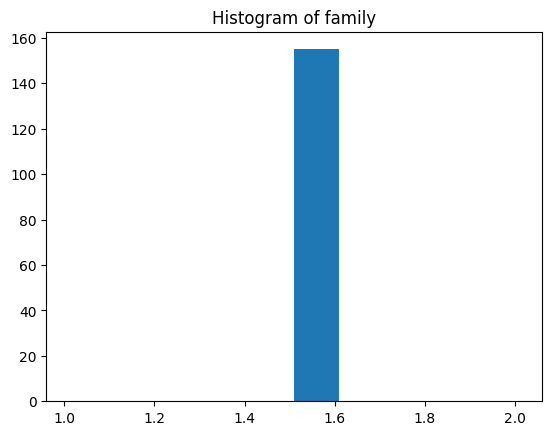

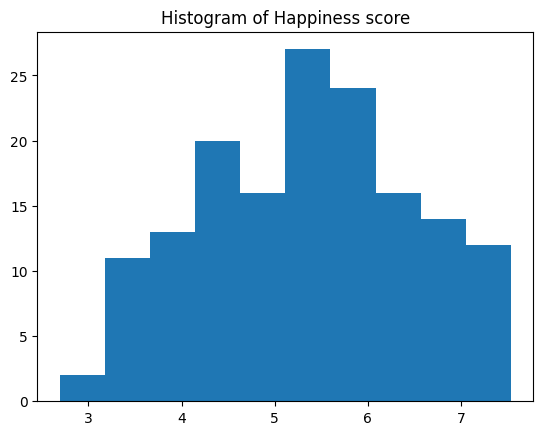

In [ ]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogramFamily1(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogramFamily1(inputs, 'family')
plotDataHistogramFamily1(outputs, 'Happiness score')

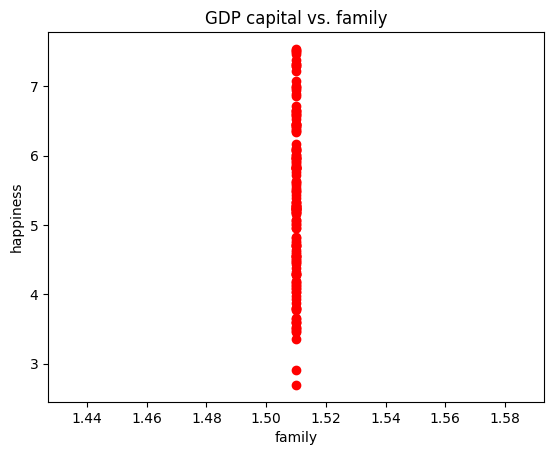

In [ ]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
def checkLinearityFamily1(inputs, outputs):
  plt.plot(inputs, outputs, 'ro')
  plt.xlabel('family')
  plt.ylabel('happiness')
  plt.title('GDP capital vs. family')
  plt.show()

checkLinearityFamily1(inputs, outputs)


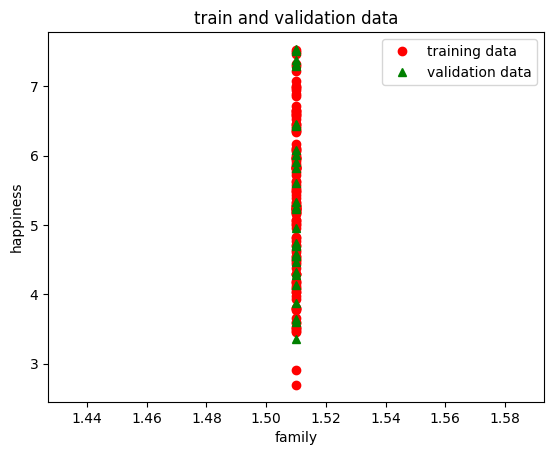

In [ ]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.
def data_split_family_1(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  validationSample = [i for i in indexes  if not i in trainSample]

  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]

  validationInputs = [inputs[i] for i in validationSample]
  validationOutputs = [outputs[i] for i in validationSample]

  plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
  plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
  plt.title('train and validation data')
  plt.xlabel('family')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

  return trainInputs, trainOutputs, validationInputs, validationOutputs

trainInputs, trainOutputs, validationInputs, validationOutputs = data_split_family_1(inputs, outputs)


In [ ]:
def learn_model_family_2(trainInputs, trainOutputs):
  # using developed code
  # model initialisation
  regressor = MyLinearUnivariateRegression()
  # training the model by using the training inputs and known training outputs
  regressor.fit(trainInputs, trainOutputs)
  # save the model parameters
  w0, w1 = regressor.intercept_, regressor.coef_
  print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')
  return regressor, w0, w1

regressor, w0, w1 = learn_model_family_2(inputs, outputs)

the learnt model: f(x) =  -5.384056747336893  +  7.111111111111111  * x


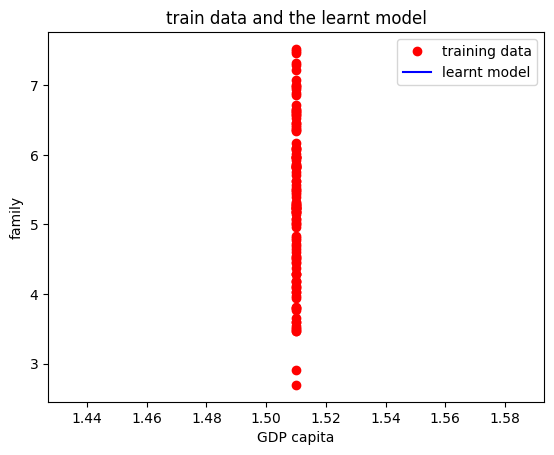

In [ ]:

# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('family')
plt.legend()
plt.show()

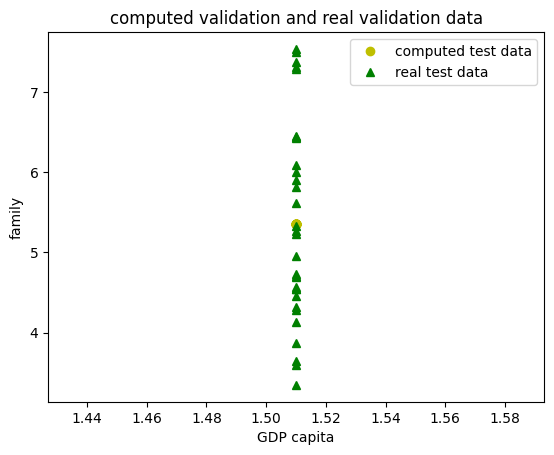

In [ ]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('family')
plt.legend()
plt.show()

In [ ]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.488969189944238
prediction error (tool):   1.4889691899442383


Problema 2 - folosim tool propriu pentru rezolvarea problemei in functie de parametrii gdp si freedom

In [ ]:

def loadDataFromGitHubGDP_F1(github_raw_url, inputVariabName1, inputVariabName2, outputVariabName):
    # Descarcă fișierul de pe GitHub
    response = urllib.request.urlopen(github_raw_url)
    lines = [line.decode('utf-8') for line in response.readlines()]

    data = []
    dataNames = []
    csv_reader = csv.reader(lines, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i == 0:
            dataNames = row
        else:
            data.append(row)

        gdp_idx = dataNames.index(inputVariabName1)
    freedom_idx = dataNames.index(inputVariabName2)
    happiness_idx = dataNames.index(outputVariabName)

    inputs = []
    outputs = []
    gdp_values = []
    freedom_values = []
    happiness_values = []
    invalid_rows = 0

    for row in data:
        try:
            gdp = float(row[gdp_idx])
            freedom = float(row[freedom_idx])
            happiness = float(row[happiness_idx])

            # Validare valori
            if gdp > 0 and freedom > 0 and happiness > 0:
                inputs.append([gdp, freedom])
                outputs.append(happiness)
                gdp_values.append(gdp)
                freedom_values.append(freedom)
                happiness_values.append(happiness)
            else:
                invalid_rows += 1
        except (ValueError, IndexError):
            invalid_rows += 1

    # Raport statistic
    print(f"\nStatistici încărcare:")
    print(f"- Rânduri totale: {len(data)}")
    print(f"- Rânduri valide: {len(inputs)}")
    print(f"- Rânduri filtrate: {invalid_rows}")

    return inputs, outputs, gdp_values, freedom_values, happiness_values

# Link-ul raw către fișierul de pe GitHub

inputs, outputs, gdp, freedom, happiness = loadDataFromGitHubGDP_F1(
        github_raw_url1,
        'Economy..GDP.per.Capita.',
        'Freedom',
        'Happiness.Score'
    )
print('in:  ', inputs[:5])
print('out: ', outputs[:5])


Statistici încărcare:
- Rânduri totale: 155
- Rânduri valide: 153
- Rânduri filtrate: 2
in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [ ]:
def plot_histogramsGDP_F1(data, title, xlabel, color='skyblue'):
    """Funcție pentru plotarea histogramei"""
    plt.figure(figsize=(8, 5))
    plt.hist(data, color=color, alpha=0.7)
    plt.title(f'Distribuția {title}', fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frecvență', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

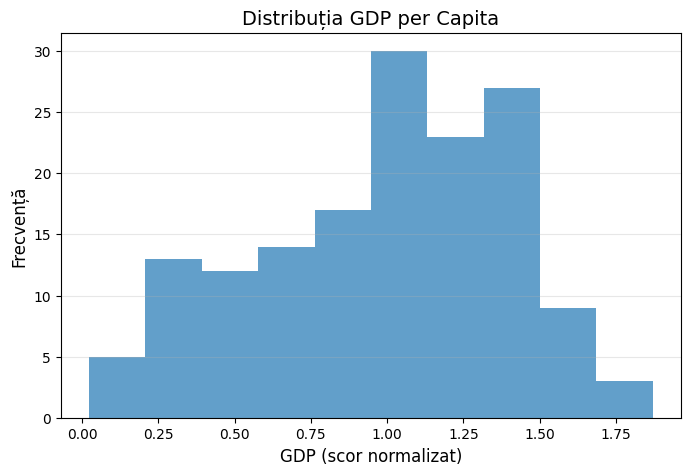

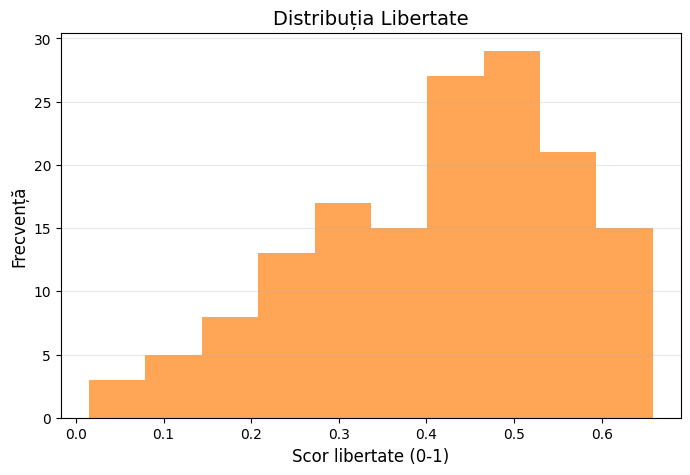

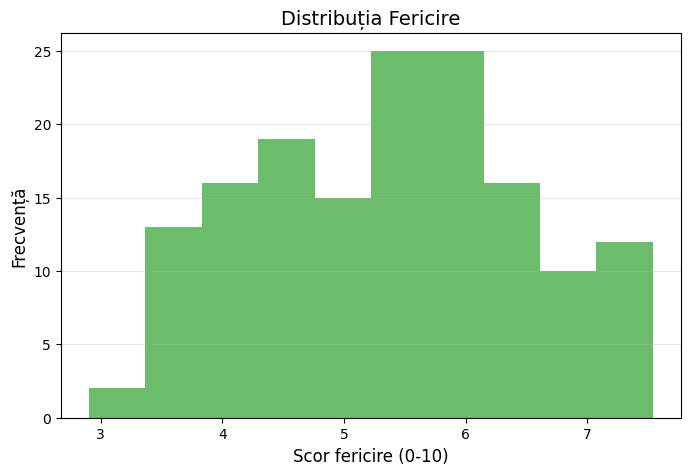

In [ ]:
plot_histogramsGDP_F1(gdp, 'GDP per Capita', 'GDP (scor normalizat)', color='#1f77b4')
plot_histogramsGDP_F1(freedom, 'Libertate', 'Scor libertate (0-1)', color='#ff7f0e')
plot_histogramsGDP_F1(happiness, 'Fericire', 'Scor fericire (0-10)', color='#2ca02c')

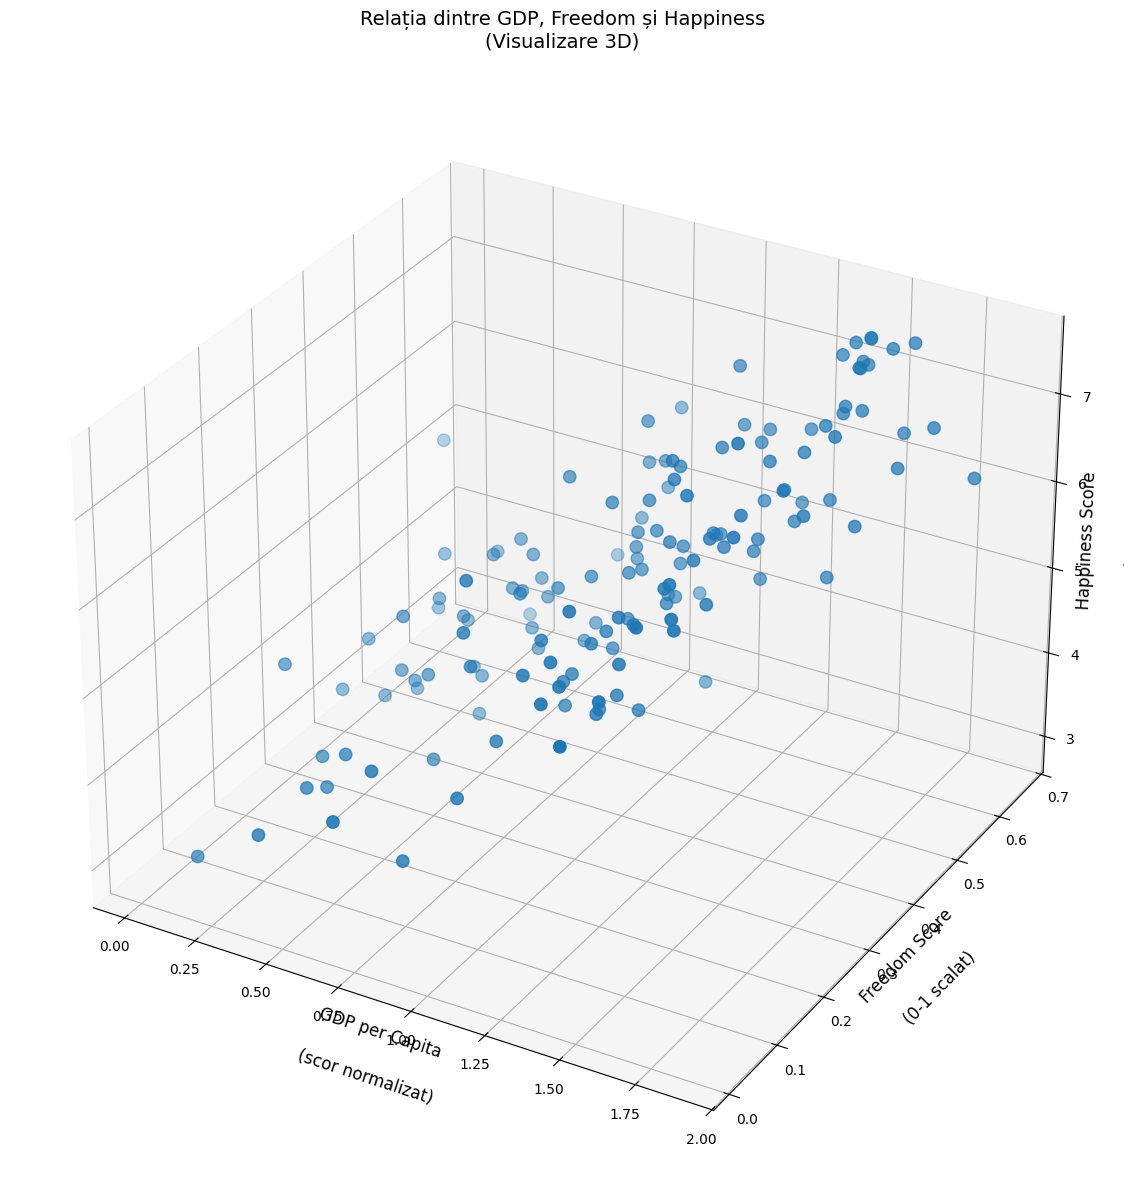

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def checkLinearity3D(inputs, outputs, figsize=(14, 10)):
    """
    Vizualizare 3D mare a relației dintre GDP, Freedom și Happiness
    Args:
        inputs: Listă de tuple (GDP, Freedom)
        outputs: Listă de scoruri Happiness
        figsize: Dimensiunea figurii (lățime, înălțime)
    """
    gdp = [x[0] for x in inputs]
    freedom = [x[1] for x in inputs]
    happiness = outputs

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        gdp, freedom, happiness,
        s=80
    )

    ax.set_xlabel('GDP per Capita\n(scor normalizat)', fontsize=12, linespacing=3)
    ax.set_ylabel('Freedom Score\n(0-1 scalat)', fontsize=12, linespacing=3)
    ax.set_zlabel('Happiness Score\n(0-10)', fontsize=12, linespacing=3)

    plt.title('Relația dintre GDP, Freedom și Happiness\n(Visualizare 3D)',
             fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

checkLinearity3D(inputs, outputs, figsize=(16, 12))

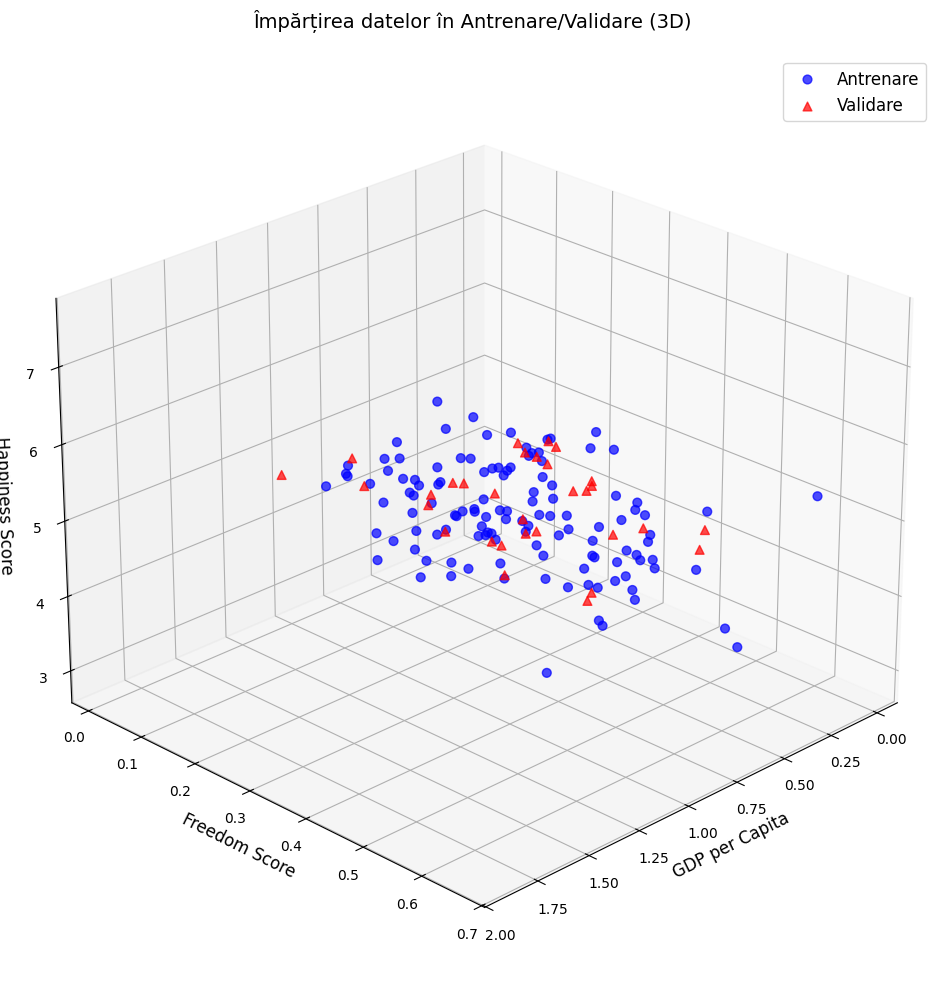

Statistici împărțire:
- Total instanțe: 153
- Antrenare: 122 (79.7%)
- Validare: 31 (20.3%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)
indexes = np.arange(len(inputs))
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = np.setdiff1d(indexes, trainSample)

trainGDP = [inputs[i][0] for i in trainSample]
trainFreedom = [inputs[i][1] for i in trainSample]
trainHappiness = [outputs[i] for i in trainSample]

valGDP = [inputs[i][0] for i in validationSample]
valFreedom = [inputs[i][1] for i in validationSample]
valHappiness = [outputs[i] for i in validationSample]

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(trainGDP, trainFreedom, trainHappiness,
           c='blue', marker='o', s=40, alpha=0.7, label='Antrenare')

ax.scatter(valGDP, valFreedom, valHappiness,
           c='red', marker='^', s=40, alpha=0.7, label='Validare')

ax.set_xlabel('GDP per Capita', fontsize=12)
ax.set_ylabel('Freedom Score', fontsize=12)
ax.set_zlabel('Happiness Score', fontsize=12)
ax.set_title('Împărțirea datelor în Antrenare/Validare (3D)', fontsize=14, pad=20)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print(f"Statistici împărțire:")
print(f"- Total instanțe: {len(inputs)}")
print(f"- Antrenare: {len(trainSample)} ({len(trainSample)/len(inputs):.1%})")
print(f"- Validare: {len(validationSample)} ({len(validationSample)/len(inputs):.1%})")

In [ ]:
import numpy as np
from sklearn import linear_model

min_len = min(len(trainGDP), len(trainFreedom), len(trainOutputs))

trainGDP = trainGDP[:min_len]
trainFreedom = trainFreedom[:min_len]
trainOutputs = trainOutputs[:min_len]

X_train = np.column_stack((trainGDP, trainFreedom))
y_train = np.array(trainOutputs)

try:
    regressor = MyLinearBivariateRegression()
    regressor.fit(X_train, y_train)
    print(f"the learnt model f(x) = {regressor.intercept_:.4f} + {regressor.coef_[0]}*x1 + {regressor.coef_[1]}*x2")

except Exception as e:
    print(f"\nEroare la antrenare: {str(e)}")

the learnt model f(x) = 5.1856 + 0.31748848139915375*x1 + -0.37906416365606904*x2


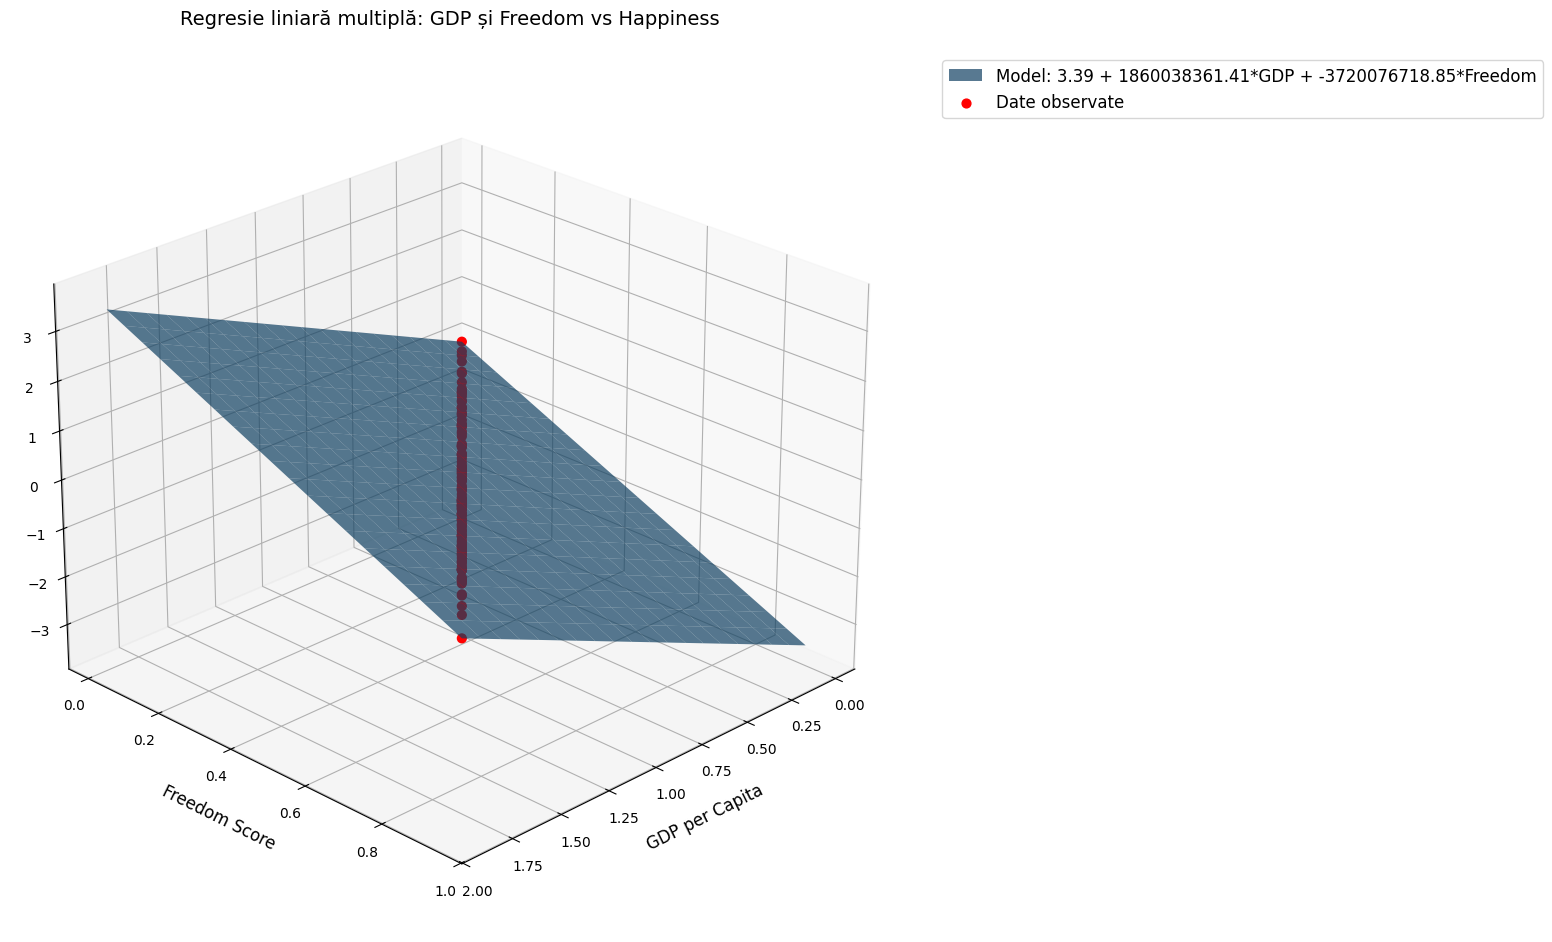

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_regression(X_train, y_train, regressor):
    """
    Vizualizare 3D a modelului de regresie cu două variabile
    Args:
        X_train: matrice numpy de forma (n_samples, 2) [GDP, Freedom]
        y_train: vector numpy de forma (n_samples,) [Happiness]
        regressor: modelul LinearRegression antrenat
    """
    w0 = regressor.intercept_
    w1, w2 = regressor.coef_

    gdp = X_train[:, 0]
    freedom = X_train[:, 1]

    gdp_range = np.linspace(min(gdp), max(gdp), 20)
    freedom_range = np.linspace(min(freedom), max(freedom), 20)
    gdp_grid, freedom_grid = np.meshgrid(gdp_range, freedom_range)

    happiness_grid = w0 + w1*gdp_grid + w2*freedom_grid

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(gdp_grid, freedom_grid, happiness_grid,
                           alpha=0.7,
                         label=f'Model: {w0:.2f} + {w1:.2f}*GDP + {w2:.2f}*Freedom')

    ax.scatter(gdp, freedom, y_train,
              c='red', s=40, alpha=1,
              label='Date observate')

    ax.set_xlabel('GDP per Capita', fontsize=12, labelpad=10)
    ax.set_ylabel('Freedom Score', fontsize=12, labelpad=10)
    ax.set_zlabel('Happiness Score', fontsize=12, labelpad=10)
    ax.set_title('Regresie liniară multiplă: GDP și Freedom vs Happiness',
                fontsize=14, pad=20)

    ax.view_init(elev=25, azim=45)


    ax.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_3d_regression(X_train, y_train, regressor)

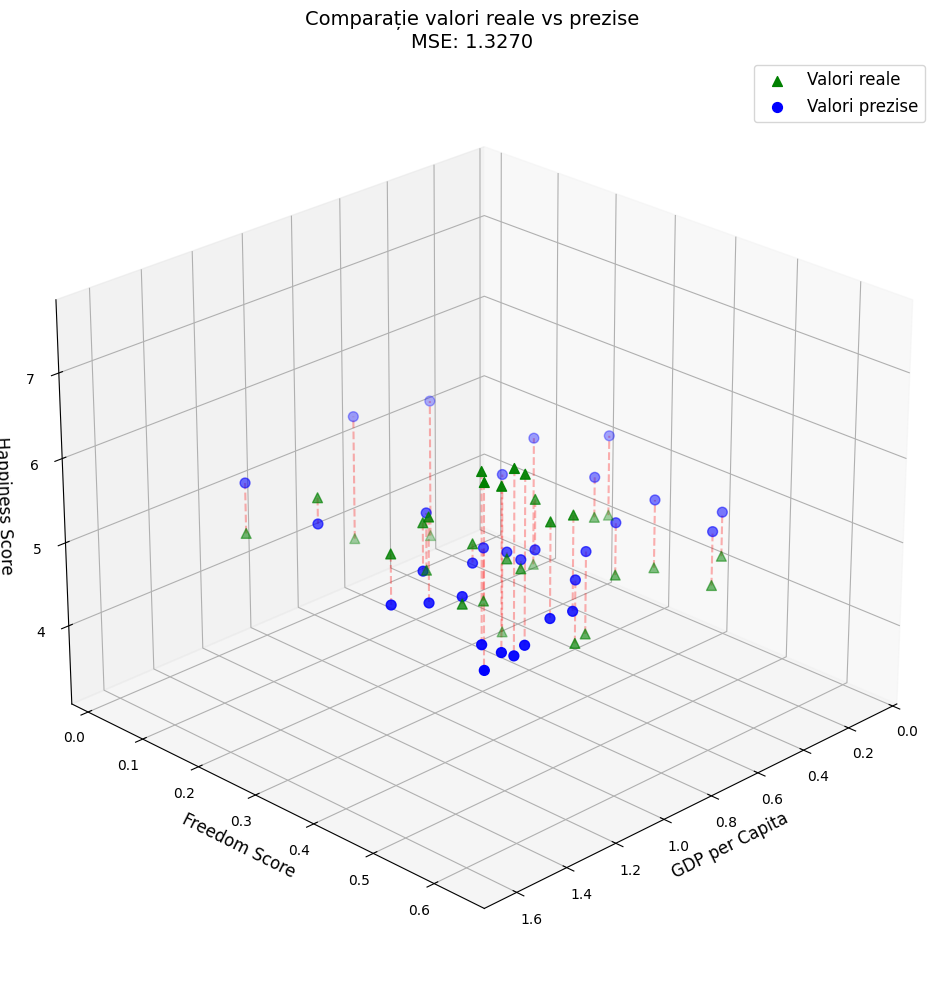

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

validationInputs = np.column_stack((valGDP, valFreedom))
validationOutputs = np.array(validationOutputs)

computedValidationOutputs = regressor.predict(validationInputs)
errors = validationOutputs - computedValidationOutputs
mse = np.mean(errors**2)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(valGDP, valFreedom, validationOutputs,
           c='green', marker='^', s=50, label='Valori reale')

ax.scatter(valGDP, valFreedom, computedValidationOutputs,
           c='blue', marker='o', s=50, label='Valori prezise')

for gdp, freedom, real, pred in zip(valGDP, valFreedom, validationOutputs, computedValidationOutputs):
    ax.plot([gdp, gdp], [freedom, freedom], [real, pred], 'r--', alpha=0.3)

ax.set_xlabel('GDP per Capita', fontsize=12)
ax.set_ylabel('Freedom Score', fontsize=12)
ax.set_zlabel('Happiness Score', fontsize=12)
ax.set_title(f'Comparație valori reale vs prezise\nMSE: {mse:.4f}', fontsize=14)
ax.legend(fontsize=12)
ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()


In [ ]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.327040045132084
prediction error (tool):   1.327040045132084
